<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Outlier Analysis</p> 

  + Outliers can be of two types: Univariate and Multivariate. 
  + **Univariate outliers can be found when we look at distribution of a single variable.** 
  + **Multi-variate outliers are outliers in an n-dimensional space.** 

### Different outlier detection technique
+ Hypothesis Testing
+ Z-score method 
+ Robust Z-score 
+ I.Q.R method  
+ Winsorization method(Percentile Capping) 
+ DBSCAN Clustering 
+ Isolation Forest  
+ Visualizing the data 

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Hypothesis Testing</p> 

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd 
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing
import scipy

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

lat = 22.9
lon = 77.86
Data = pd.read_csv(rf'D:\EG\Project Data\ML_Model_Datasets\CYGNSS_SMAP_2019_21_{lat}_{lon}.csv')
Data = Data.interpolate()
Data

sp_inc_angle  sp_rx_gain  gps_tx_power_db_w  gps_ant_gain_db_i  \
0        10.583468   10.460383          16.843000          14.833932   
1        36.991842    9.856939          15.382000          15.474989   
2        16.143141   12.174973          15.465000          14.681092   
3        21.381812   13.217389          16.016638          14.749246   
4        26.620483   14.259805          16.568276          14.817400   
...            ...         ...                ...                ...   
1091     39.266125    9.659336          13.483000          16.240831   
1092     38.408414    8.471717          13.955500          16.178141   
1093     37.550703    7.284097          14.428000          16.115451   
1094     37.550703    7.284097          14.428000          16.115451   
1095     37.550703    7.284097          14.428000          16.115451   

        ddm_snr  ddm_noise_floor  rx_to_sp_range  tx_to_sp_range  \
0      7.188014      5943.125500   540114.000000    2.024588e+07   
1     10.031906      7866.261300   632412.500000    2.116108e+07   
2      7.780371      6217.302123   535373.133333    2.031021e+07   
3      9.519363      6148.437539   559635.083908    2.049498e+07   
4     11.258355      6079.572955   583897.034483    2.067974e+07   
...         ...              ...             ...             ...   
1091   4.717852      5918.146917   670309.750000    2.124113e+07   
1092   6.074875      6461.570625   661466.375000    2.156417e+07   
1093   7.431898      7004.994333   652623.000000    2.188721e+07   
1094   7.431898      7004.994333   652623.000000    2.188721e+07   
1095   7.431898      7004.994333   652623.000000    2.188721e+07   

      quality_flags  peak of power_analog    SR_eff        Date  \
0      2.693130e+05          3.160071e-17  2.056695  01-01-2020   
1      1.344870e+08          7.750842e-17  6.179150  02-01-2020   
2      1.344966e+08          6.950786e-17  4.059113  03-01-2020   
3      6.739893e+07          1.002697e-16  5.341512  04-01-2020   
4      3.012336e+05          1.310316e-16  6.623910  05-01-2020   
...             ...                   ...       ...         ...   
1091   2.693130e+05          1.544805e-17  1.382049  27-12-2019   
1092   2.693130e+05          2.333451e-17  2.534666  28-12-2019   
1093   2.693130e+05          3.122098e-17  3.687283  29-12-2019   
1094   2.693130e+05          3.122098e-17  3.687283  30-12-2019   
1095   2.693130e+05          3.122098e-17  3.687283  31-12-2019   

      SMAP_Soil_Moisture  
0               0.241491  
1               0.271814  
2               0.292451  
3               0.278970  
4               0.286393  
...                  ...  
1091            0.227777  
1092            0.272128  
1093            0.222900  
1094            0.222900  
1095            0.222900  

[1096 rows x 13 columns]

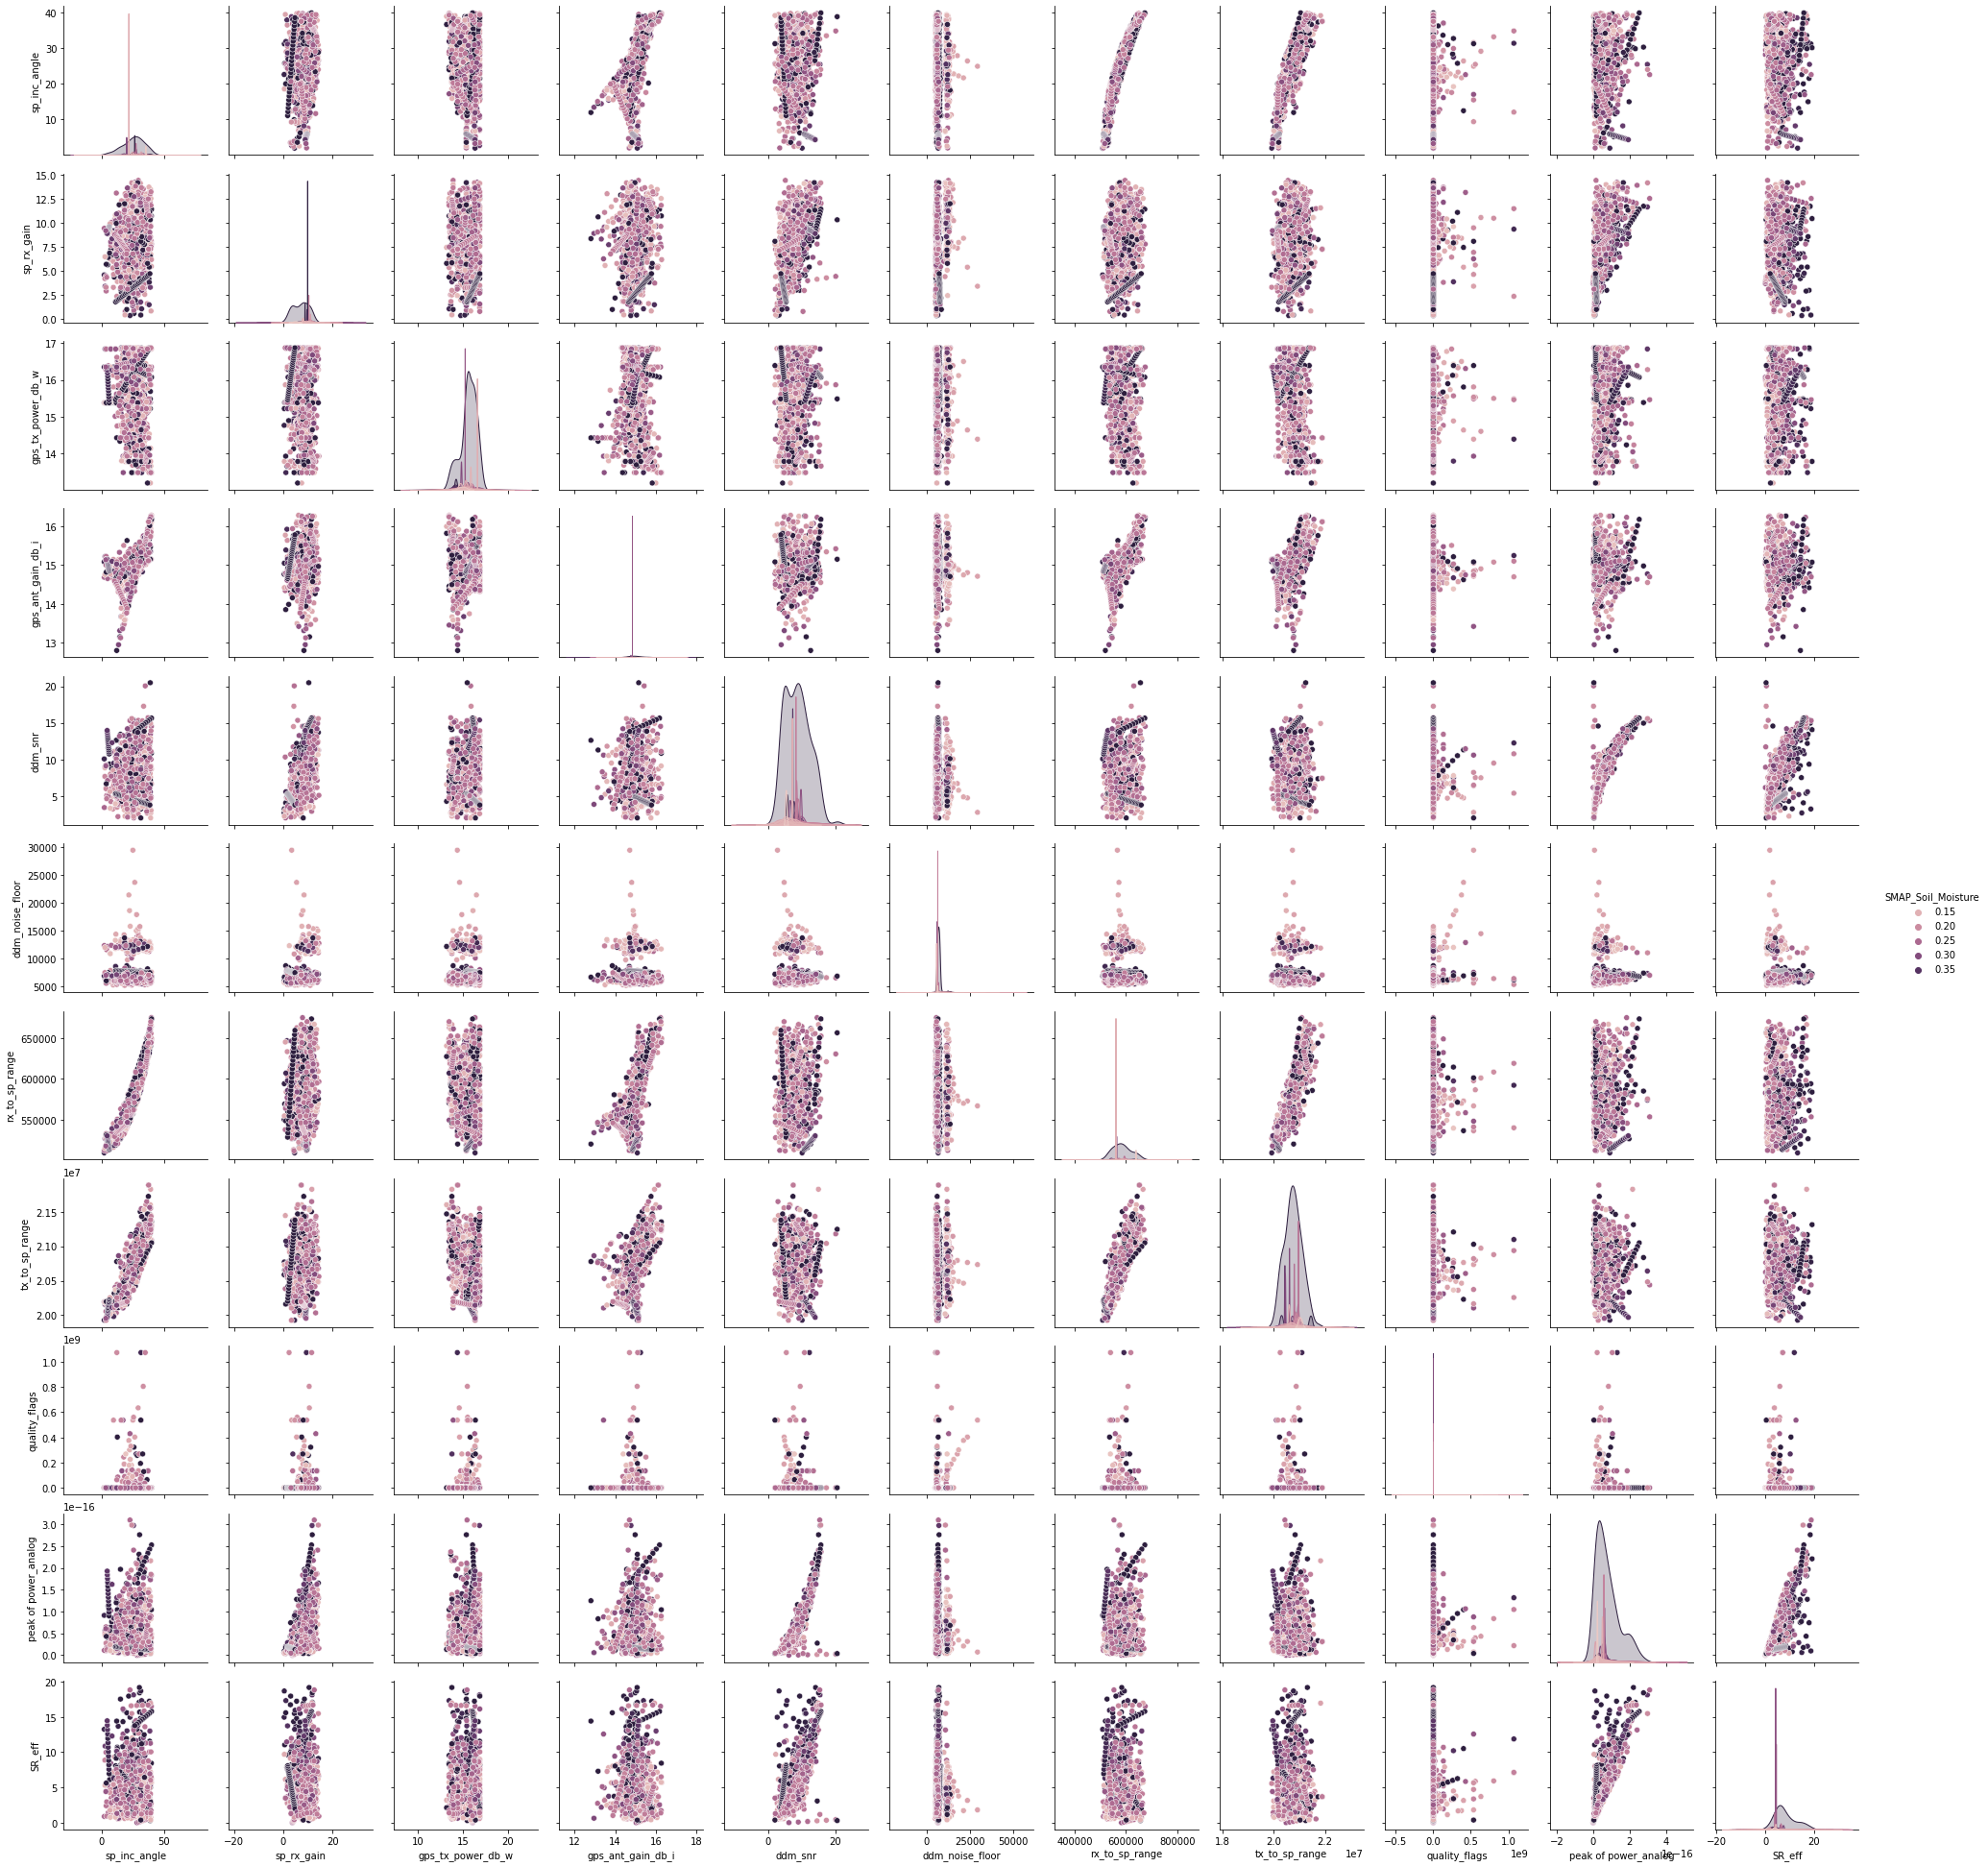

In [2]:
sns.pairplot(Data, hue = 'SMAP_Soil_Moisture')

# **Grubbs' test
+ Ho: There are no outliers in the data set. 
+ H1: There is exactly one outlier in the data set.
+ The Grubbs' test statistic is defined as:
$$
G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{STD}
$$

$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$

+ If the calculated value is greater than critical, reject the null hypothesis and conclude that one of the values is an outlier.

In [3]:
def Grubbs_test(data):
    n = len(data)
    mean_data = np.mean(data)
    sd_data   = np.std(data)
    
    numerator = max(abs(data-mean_data))
    g_calculated = numerator/sd_data
    print("Calculated Value:",g_calculated)
    
    t_value = stats.t.ppf(1-0.05/(2*n),n-2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Critical Value:",g_critical)
    
    if g_calculated < g_critical:
        print("Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("Reject null hypothesis and conclude that there is an outliers\n")

In [4]:
Variables = (Data.keys())[:-2]
Variables

Index(['sp_inc_angle', 'sp_rx_gain', 'gps_tx_power_db_w', 'gps_ant_gain_db_i',
       'ddm_snr', 'ddm_noise_floor', 'rx_to_sp_range', 'tx_to_sp_range',
       'quality_flags', 'peak of power_analog', 'SR_eff'],
      dtype='object')

In [5]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print('Gribbs Test Statistics for:',Variables[i])
    Grubbs_test(df)

Gribbs Test Statistics for: sp_inc_angle
Calculated Value: 2.8888025683508785
Critical Value: 4.062484726910379
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: sp_rx_gain
Calculated Value: 2.7809056674398827
Critical Value: 4.062484726910379
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: gps_tx_power_db_w
Calculated Value: 2.58892447220334
Critical Value: 4.062484726910379
Accept null hypothesis and conclude that there is no outliers

Gribbs Test Statistics for: gps_ant_gain_db_i
Calculated Value: 4.732657113687865
Critical Value: 4.062484726910379
Reject null hypothesis and conclude that there is an outliers

Gribbs Test Statistics for: ddm_snr
Calculated Value: 4.389198482766928
Critical Value: 4.062484726910379
Reject null hypothesis and conclude that there is an outliers

Gribbs Test Statistics for: ddm_noise_floor
Calculated Value: 8.742360992785773
Critical Value: 4.062484726910379
Reject null 

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Z-score method</p>

+ Using Z score method,we can find out how many standard deviations value away from the mean. </font></div> 
+ Z-score formula

$${Z score=\frac{ X - Mean}{STD}}$$

+ If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. 
+ It is taken as outliers.

In [6]:
def Zscore_outlier(df):
    m  = np.mean(df)
    sd = np.std(df)
    Outliers = []
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            Outliers.append(i)
    return len(Outliers)

In [7]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {Zscore_outlier(df)}')

Number of outliers for sp_inc_angle : 0
Number of outliers for sp_rx_gain : 0
Number of outliers for gps_tx_power_db_w : 0
Number of outliers for gps_ant_gain_db_i : 11
Number of outliers for ddm_snr : 3
Number of outliers for ddm_noise_floor : 9
Number of outliers for rx_to_sp_range : 0
Number of outliers for tx_to_sp_range : 4
Number of outliers for quality_flags : 19
Number of outliers for peak of power_analog : 20
Number of outliers for SR_eff : 18


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Robust Z-score method</p>

+ It is also called as Median absolute deviation method. 
+ Since mean and standard deviations are heavily influenced by outliers
+ So we use median and absolute deviation from median. 
+ Robust Z-score formula 
$$
{R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}
$$
Where, 
$$
MAD = median(|X-median|)
$$
+ Suppose X follows a standard normal distribution. 
+ The MAD will converge to the median of the half normal distribution
+ Which is the 75 percentile of a normal distribution
+ N(0.75)≃0.6745

In [8]:
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    Outliers = []
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            Outliers.append(i)
    return len(Outliers)

In [9]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {ZRscore_outlier(df)}')

Number of outliers for sp_inc_angle : 0
Number of outliers for sp_rx_gain : 0
Number of outliers for gps_tx_power_db_w : 0
Number of outliers for gps_ant_gain_db_i : 5
Number of outliers for ddm_snr : 0
Number of outliers for ddm_noise_floor : 193
Number of outliers for rx_to_sp_range : 0
Number of outliers for tx_to_sp_range : 0
Number of outliers for quality_flags : 273
Number of outliers for peak of power_analog : 19
Number of outliers for SR_eff : 4


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">IQR method</p>

+ In this method by using Inter Quartile Range(IQR), we detect outliers. 
+ IQR tells us the variation in the data set.
+ Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers 
<img style="float: center;"  src=" https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400px">

+ Q1 represents the 1st quartile or 25th percentile of the data.
+ Q2 represents the 2nd quartile or median or 50th percentile of the data.
+ Q3 represents the 3rd quartile or 75th percentile of the data. 
+ (Q1–1.5IQR) represent the smallest value in the data set and (Q3+1.5IQR) represnt the largest value in the data set.

In [10]:
def IQR_Outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    Outliers = []
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            Outliers.append(i)
    return len(Outliers)

In [11]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {IQR_Outliers(df)}')

Number of outliers for sp_inc_angle : 12
Number of outliers for sp_rx_gain : 4
Number of outliers for gps_tx_power_db_w : 0
Number of outliers for gps_ant_gain_db_i : 51
Number of outliers for ddm_snr : 6
Number of outliers for ddm_noise_floor : 194
Number of outliers for rx_to_sp_range : 0
Number of outliers for tx_to_sp_range : 5
Number of outliers for quality_flags : 151
Number of outliers for peak of power_analog : 53
Number of outliers for SR_eff : 50


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Winsorization Method</p>

+ This method is similar to IQR method. 
+ Also known as Percentile Capping.
+ If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.

In [12]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    Outliers = []
    for i in df:
        if i > q3 or i < q1:
            Outliers.append(i)
    return len(Outliers)

In [13]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Number of outliers for {Variables[i]} : {Winsorization_outliers(df)}')

Number of outliers for sp_inc_angle : 22
Number of outliers for sp_rx_gain : 22
Number of outliers for gps_tx_power_db_w : 9
Number of outliers for gps_ant_gain_db_i : 20
Number of outliers for ddm_snr : 22
Number of outliers for ddm_noise_floor : 22
Number of outliers for rx_to_sp_range : 22
Number of outliers for tx_to_sp_range : 22
Number of outliers for quality_flags : 11
Number of outliers for peak of power_analog : 22
Number of outliers for SR_eff : 22


+ Winsorization Method or Percentile Capping is the better outlier detection technique than the others.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">DBSCAN</p>

+ Density - Based Spatial Clustering of Applications with Noise
  + DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers.  
  + This approach is similar to the K-mean clustering. 
  + **DBSCAN give best result for multivariate outlier detection.**

+ Epsilon:  a distance parameter that defines the radius to search for nearby neighbors.
+ Minimum number of points required to form a cluster. 

+ Using Epsilon and minPts, we can classify each data point as:
  + a point that has at least a minimum number of other points (minPts) within its radius.
  + a point is within the  radius of a core point but has less than the minimum number of other points (minPts) within its own radius.
+ Noise point –> a point that is neither a core point or a border point.

In [14]:
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(np.array(df).reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster'].value_counts().sort_values(ascending=False)

In [15]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Outliers for {Variables[i]} : \n{DB_outliers(df[:])}')
    print('\n')

Outliers for sp_inc_angle : 
0    1096
Name: cluster, dtype: int64


Outliers for sp_rx_gain : 
0    1096
Name: cluster, dtype: int64


Outliers for gps_tx_power_db_w : 
0    1096
Name: cluster, dtype: int64


Outliers for gps_ant_gain_db_i : 
0    1096
Name: cluster, dtype: int64


Outliers for ddm_snr : 
 0    1094
-1       2
Name: cluster, dtype: int64


Outliers for ddm_noise_floor : 
-1     841
 28     16
 0      11
 3      11
 17     11
 21      9
 5       9
 13      8
 11      8
 26      7
 18      7
 2       7
 12      7
 7       7
 20      7
 8       7
 14      6
 10      6
 32      6
 4       6
 6       6
 9       6
 35      6
 16      6
 15      6
 30      6
 29      6
 25      6
 22      6
 19      5
 23      5
 24      5
 34      5
 27      5
 1       5
 36      5
 31      5
 33      5
Name: cluster, dtype: int64


Outliers for rx_to_sp_range : 
-1    1096
Name: cluster, dtype: int64


Outliers for tx_to_sp_range : 
-1    1096
Name: cluster, dtype: int64


Outliers for qua

+ DBSCAN is not good for more than 10,000 data points.

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Isolation Forest</p>

+ It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest. 

<hr>
<img style="float: center;"  src="https://miro.medium.com/max/875/0*0GuMixLdSZo3V3Nh." width="450px">
<hr> 

1. It classify the data point to outlier and not outliers and works great with very high dimensional data.
2. It works based on decision tree and it isolate the outliers.
3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier. 

In [16]:
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(np.array(df).reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False)) 

In [17]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Outliers for {Variables[i]} :')
    Iso_outliers(df)
    print('\n')

Outliers for sp_inc_angle :
 1    765
-1    331
Name: cluster, dtype: int64


Outliers for sp_rx_gain :
 1    760
-1    336
Name: cluster, dtype: int64


Outliers for gps_tx_power_db_w :
 1    653
-1    443
Name: cluster, dtype: int64


Outliers for gps_ant_gain_db_i :
 1    899
-1    197
Name: cluster, dtype: int64


Outliers for ddm_snr :
 1    862
-1    234
Name: cluster, dtype: int64


Outliers for ddm_noise_floor :
 1    863
-1    233
Name: cluster, dtype: int64


Outliers for rx_to_sp_range :
 1    790
-1    306
Name: cluster, dtype: int64


Outliers for tx_to_sp_range :
 1    861
-1    235
Name: cluster, dtype: int64


Outliers for quality_flags :
 1    998
-1     98
Name: cluster, dtype: int64


Outliers for peak of power_analog :
-1    1096
Name: cluster, dtype: int64


Outliers for SR_eff :
 1    777
-1    319
Name: cluster, dtype: int64




<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Visualizing the data</p>

+ Box and whisker plot   
+ Scatter plot    
+ Histogram
+ Distribution Plot    
+ QQ plot

## **Box and whisker plot 

In [18]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

Box_plots for sp_inc_angle :


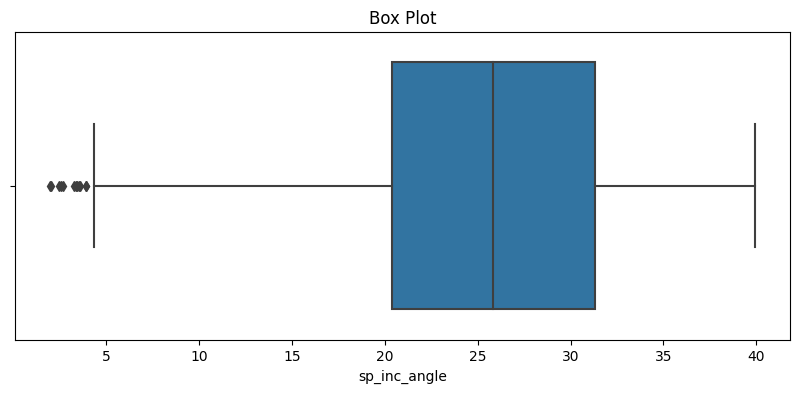



Box_plots for sp_rx_gain :


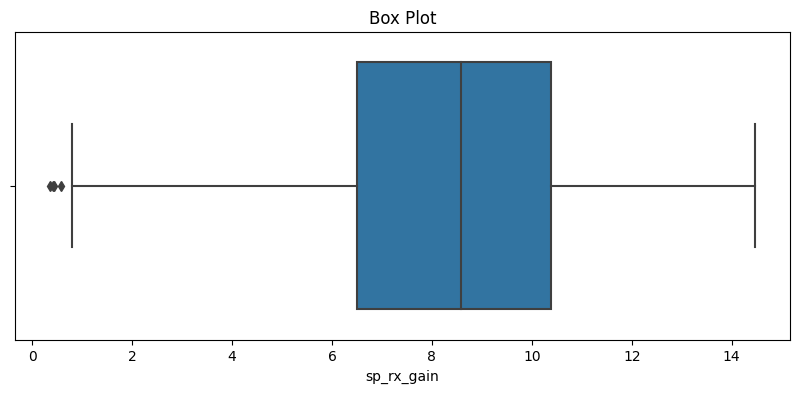



Box_plots for gps_tx_power_db_w :


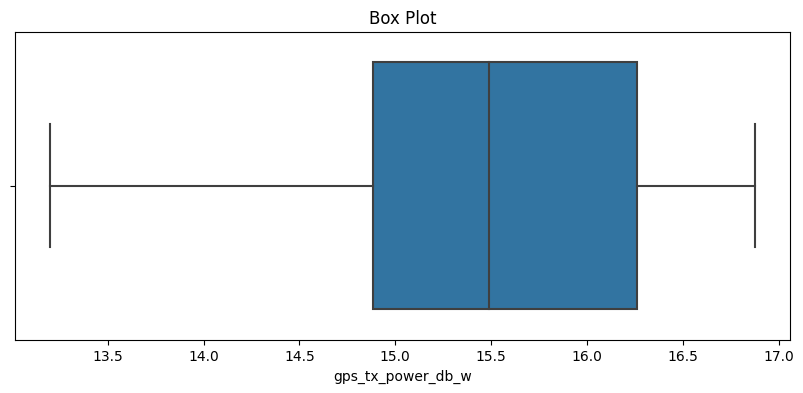



Box_plots for gps_ant_gain_db_i :


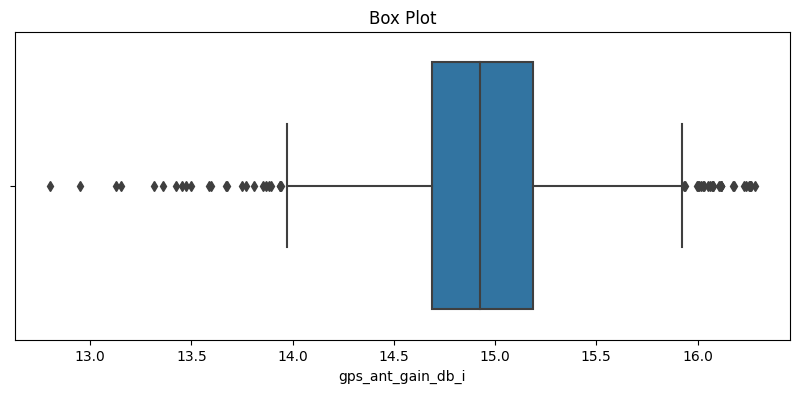



Box_plots for ddm_snr :


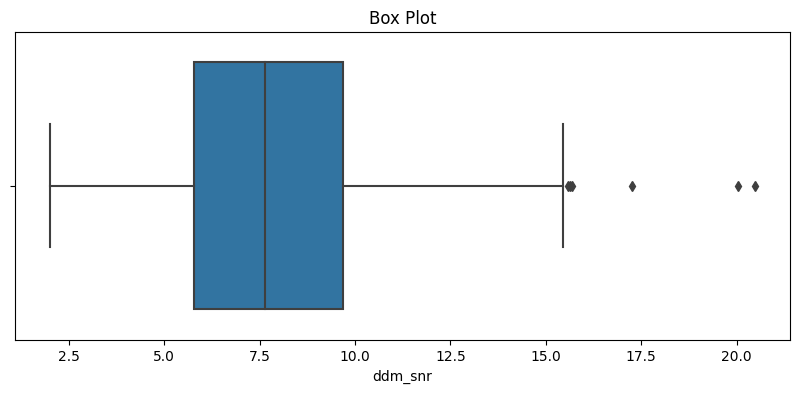



Box_plots for ddm_noise_floor :


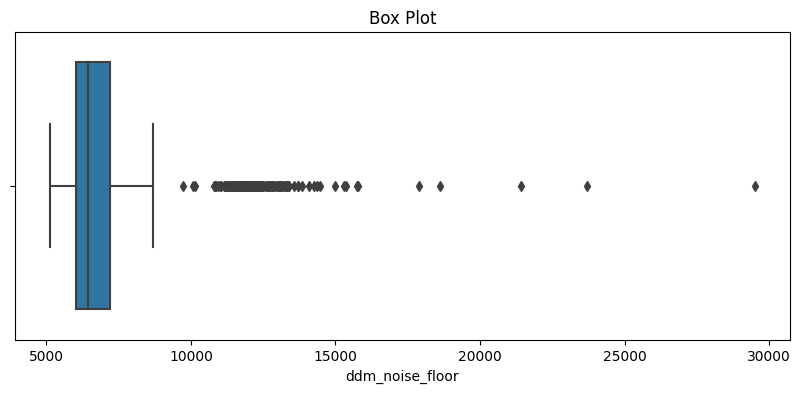



Box_plots for rx_to_sp_range :


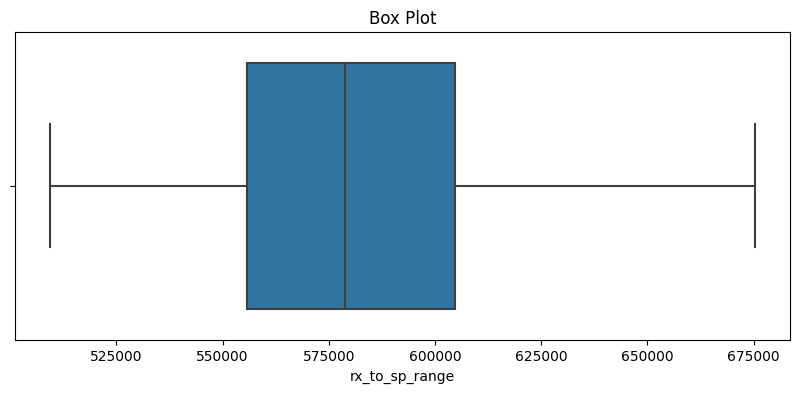



Box_plots for tx_to_sp_range :


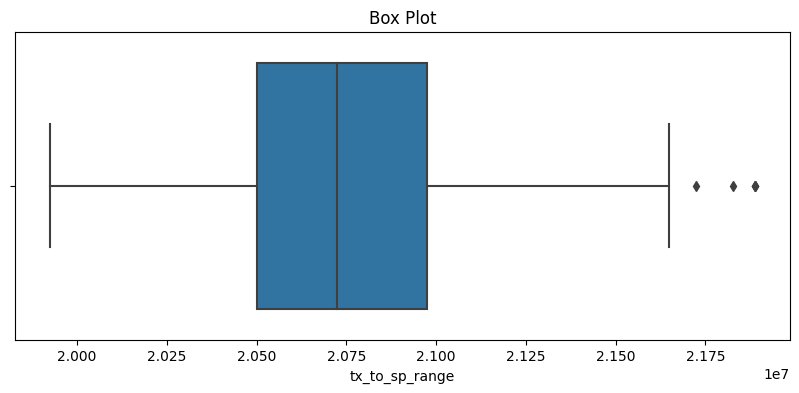



Box_plots for quality_flags :


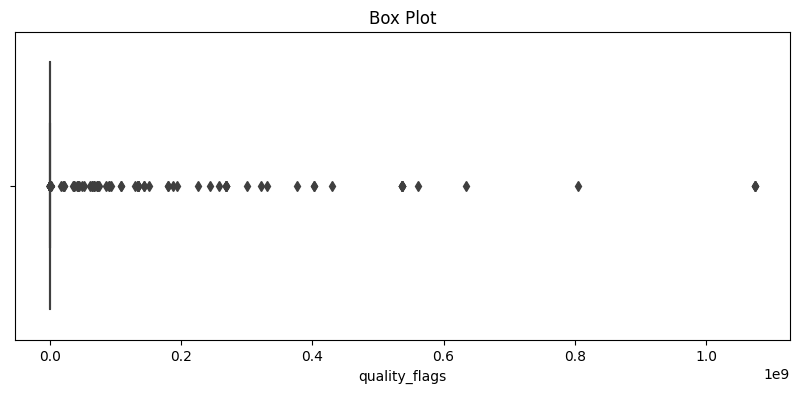



Box_plots for peak of power_analog :


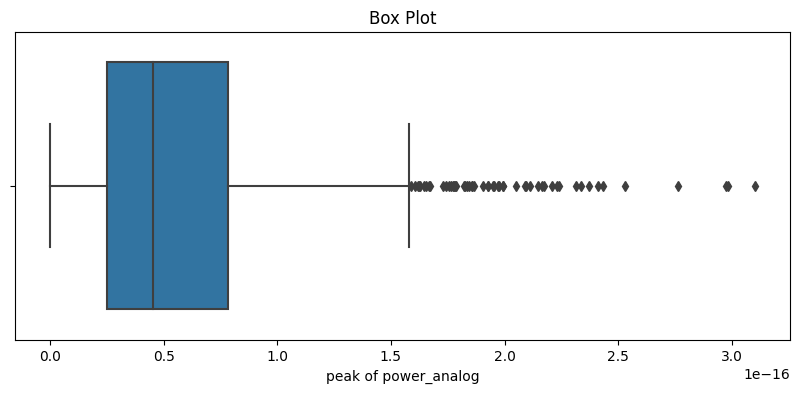



Box_plots for SR_eff :


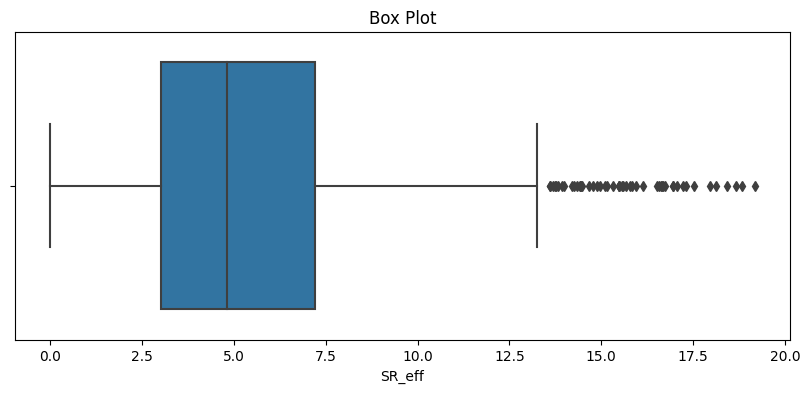

In [19]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'Box_plots for {Variables[i]} :')
    Box_plots(df)
    print('\n')

## **Histogram

In [20]:
def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

hist_plots for sp_inc_angle :


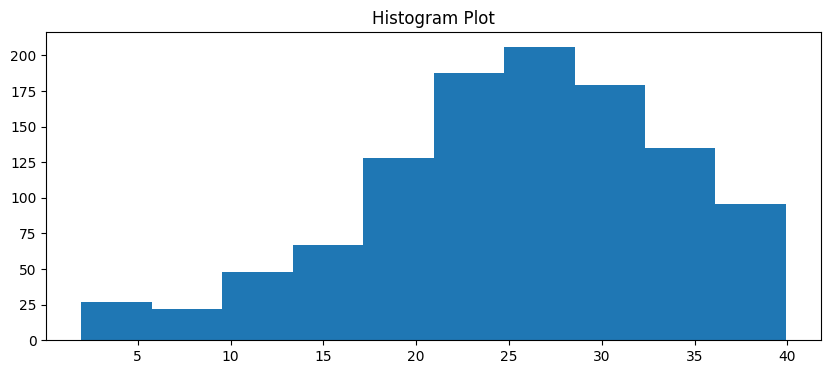



hist_plots for sp_rx_gain :


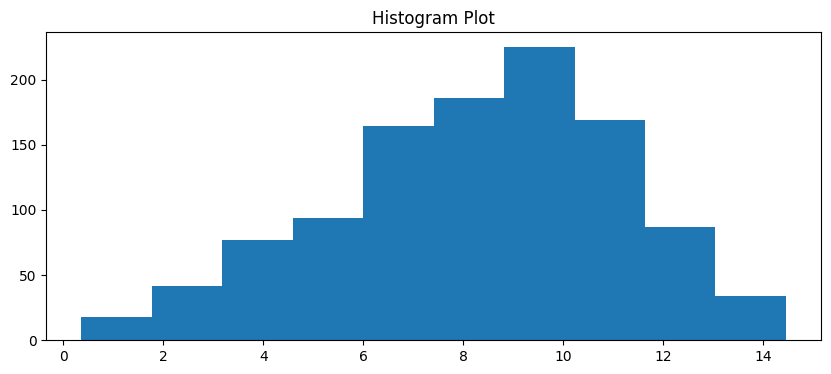



hist_plots for gps_tx_power_db_w :


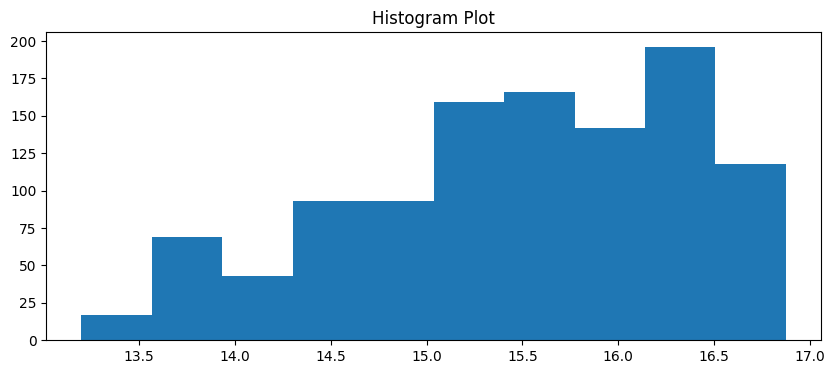



hist_plots for gps_ant_gain_db_i :


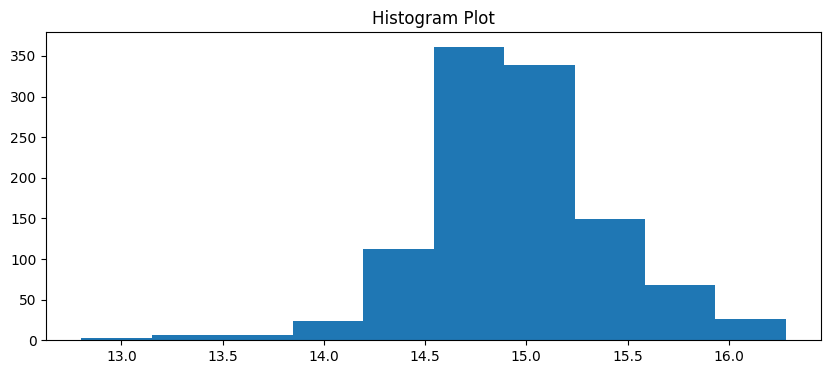



hist_plots for ddm_snr :


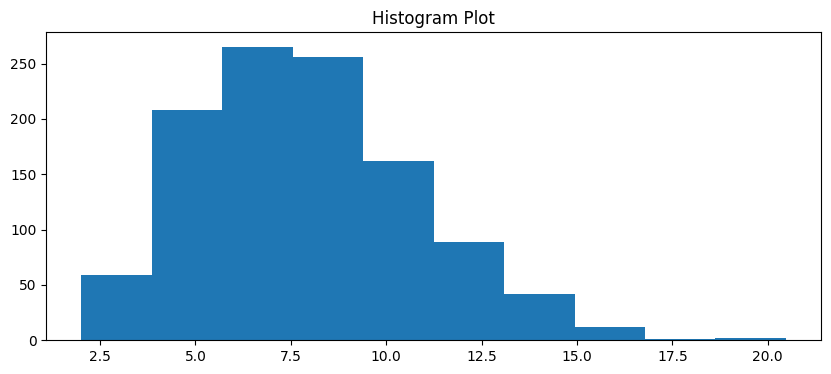



hist_plots for ddm_noise_floor :


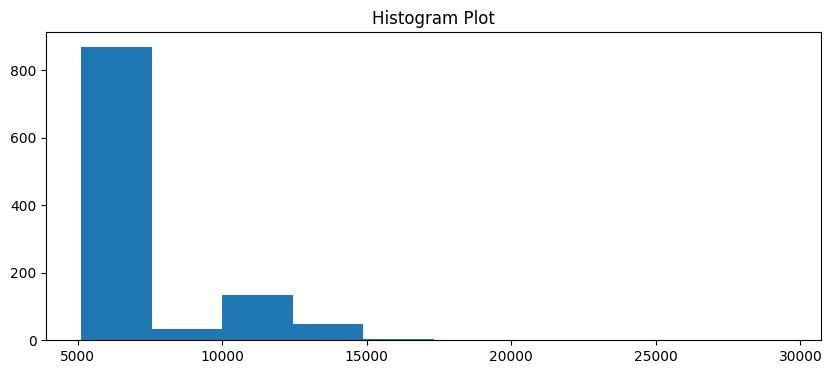



hist_plots for rx_to_sp_range :


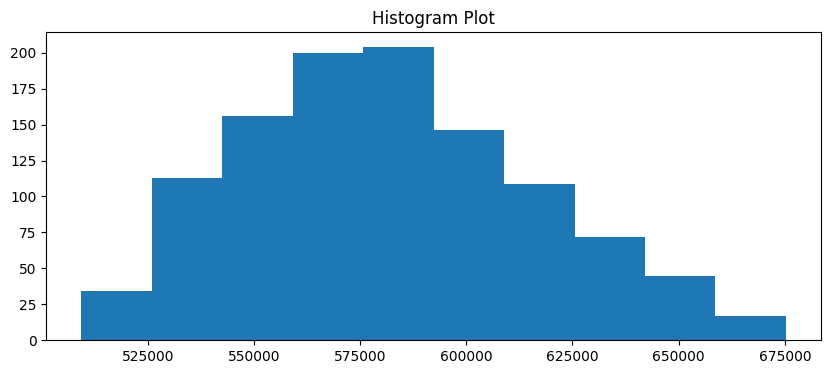



hist_plots for tx_to_sp_range :


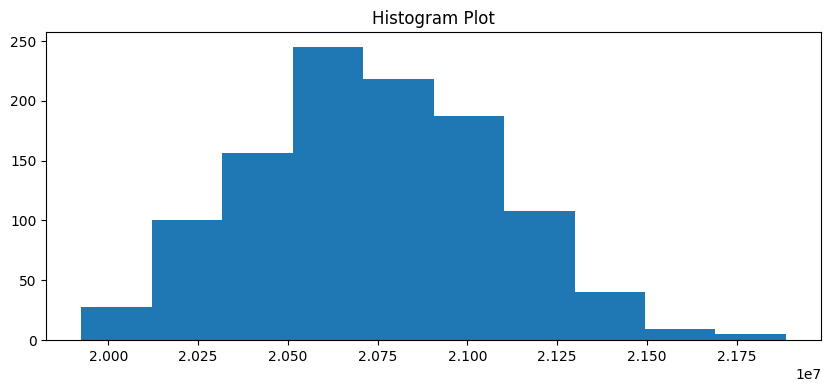



hist_plots for quality_flags :


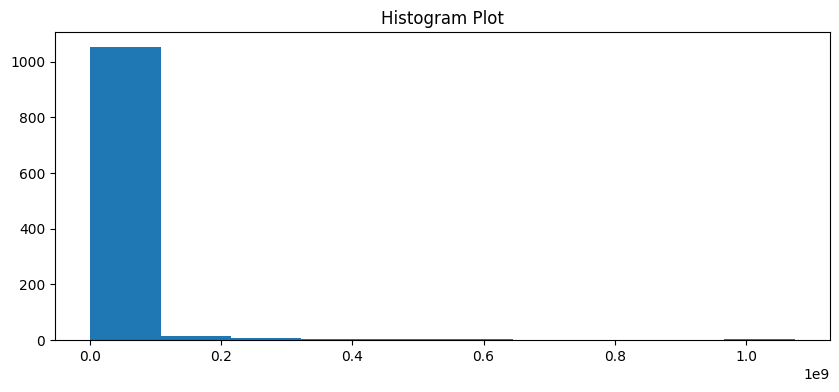



hist_plots for peak of power_analog :


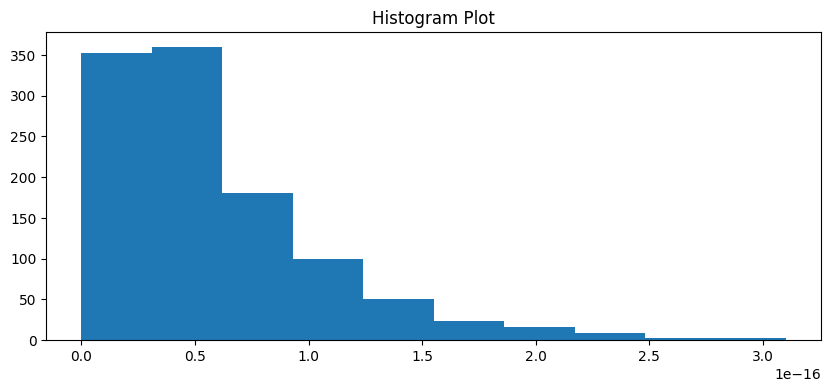



hist_plots for SR_eff :


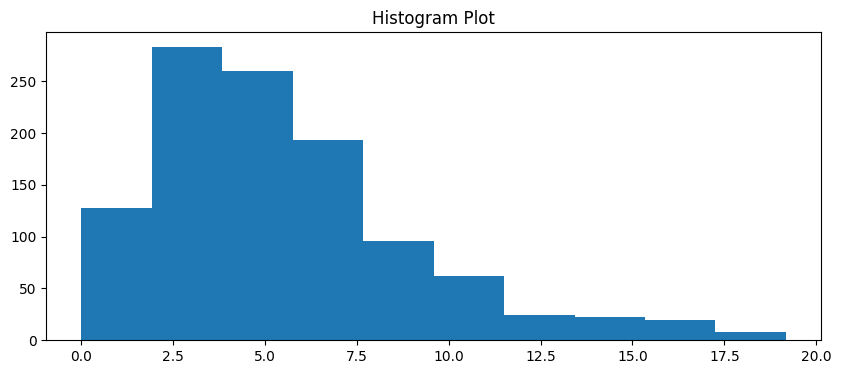

In [21]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'hist_plots for {Variables[i]} :')
    hist_plots(df)
    print('\n')

## **Scatter plot

In [22]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Soil Moisture')
    plt.title("Scatter Plot")
    plt.show()

scatter_plots for sp_rx_gain with SMAP_Soil_Moisture:


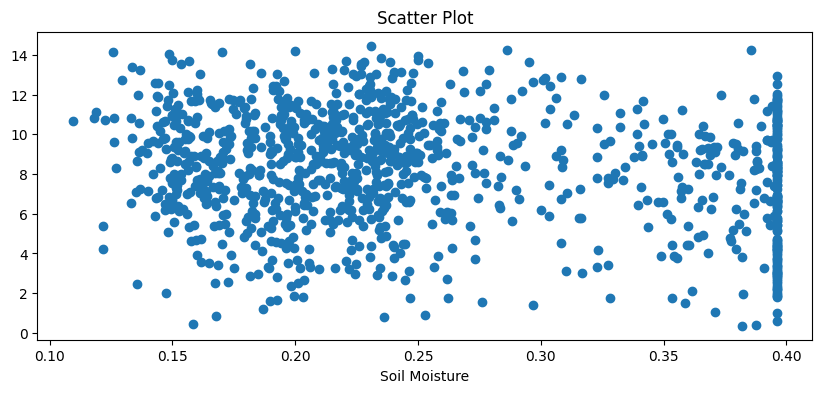



scatter_plots for gps_tx_power_db_w with SMAP_Soil_Moisture:


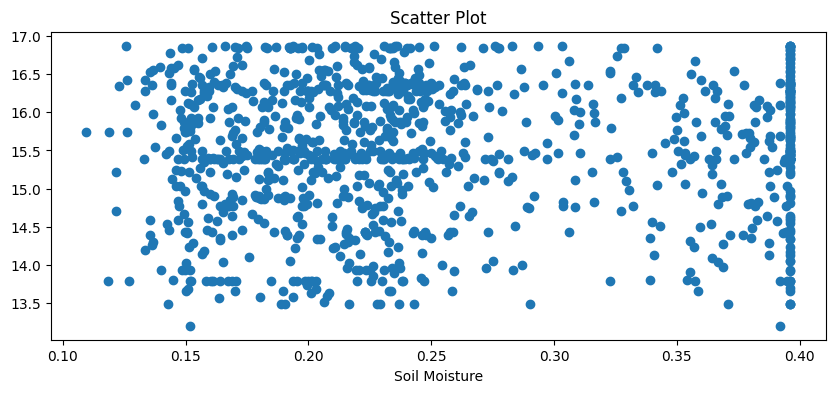



scatter_plots for gps_ant_gain_db_i with SMAP_Soil_Moisture:


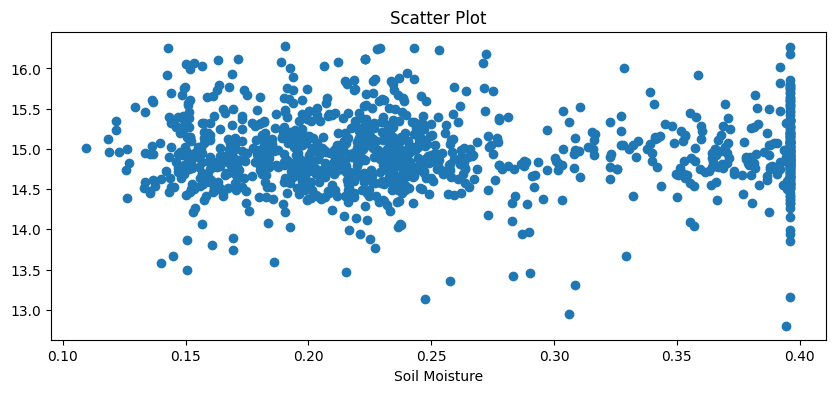



scatter_plots for ddm_snr with SMAP_Soil_Moisture:


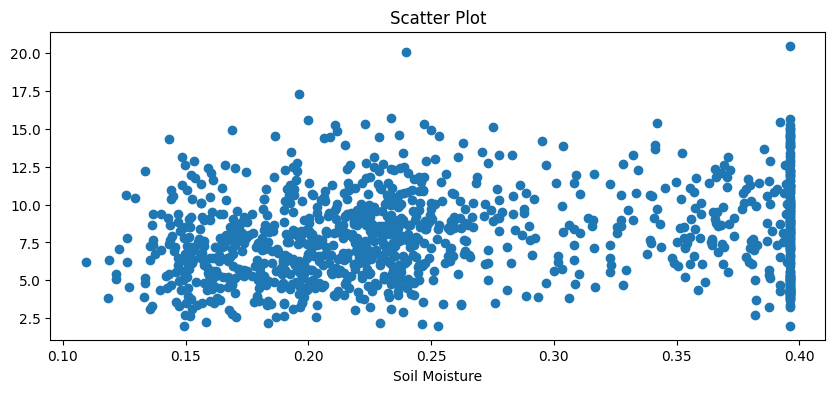



scatter_plots for ddm_noise_floor with SMAP_Soil_Moisture:


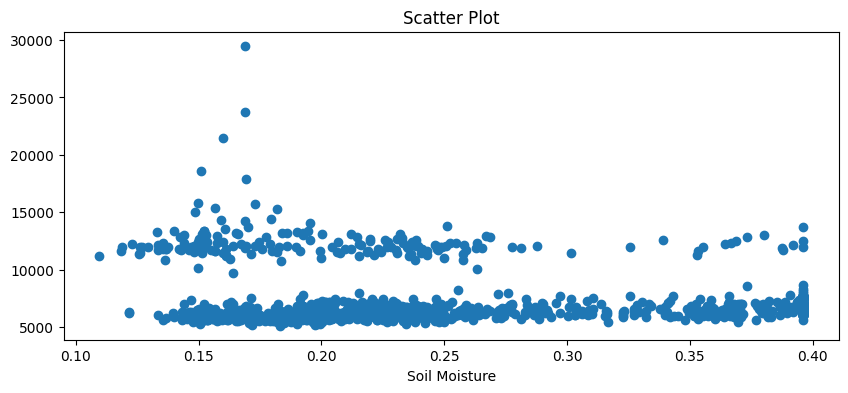



scatter_plots for rx_to_sp_range with SMAP_Soil_Moisture:


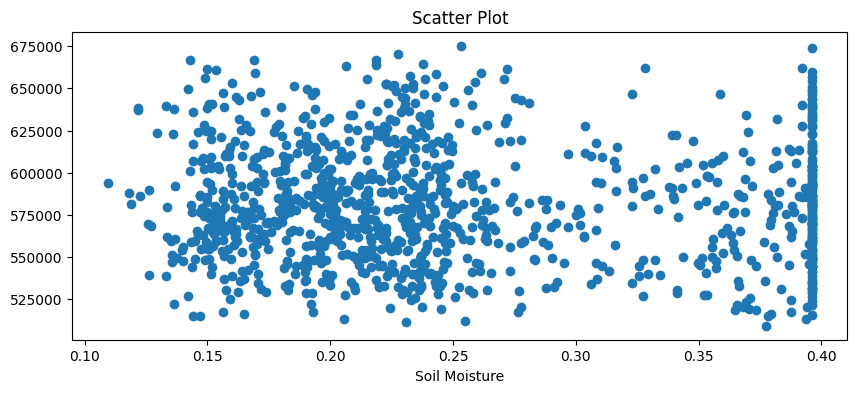



scatter_plots for tx_to_sp_range with SMAP_Soil_Moisture:


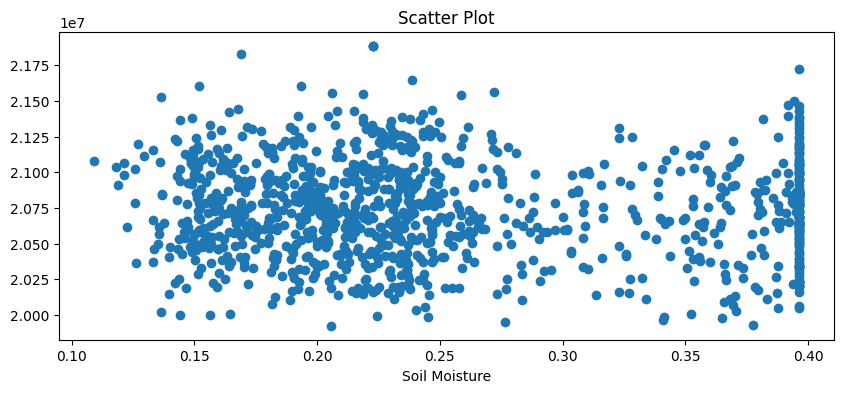



scatter_plots for quality_flags with SMAP_Soil_Moisture:


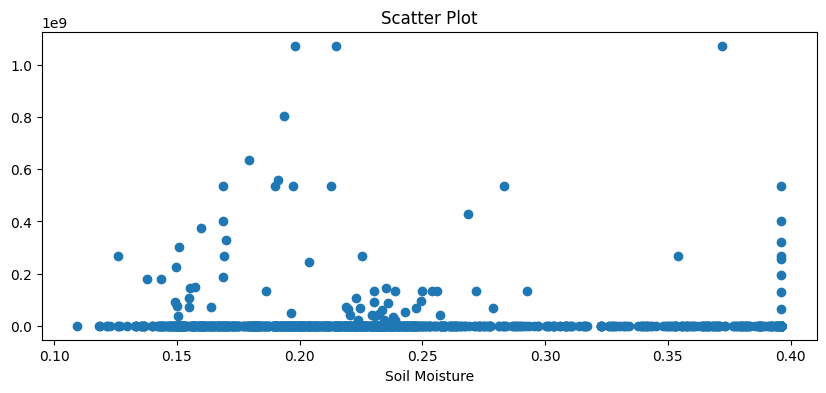



scatter_plots for peak of power_analog with SMAP_Soil_Moisture:


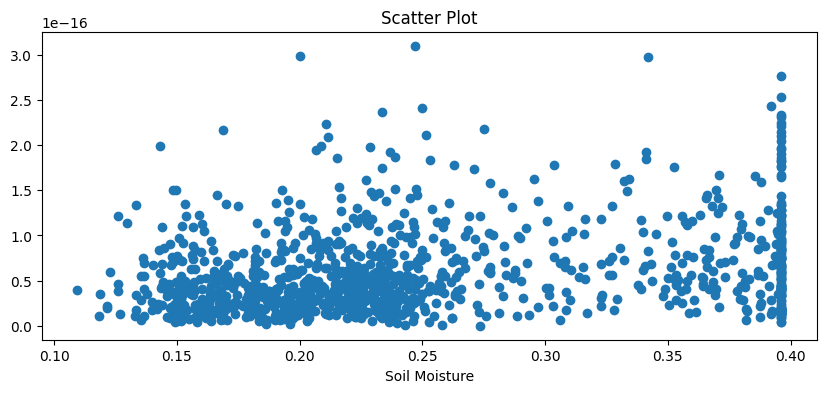



scatter_plots for SR_eff with SMAP_Soil_Moisture:


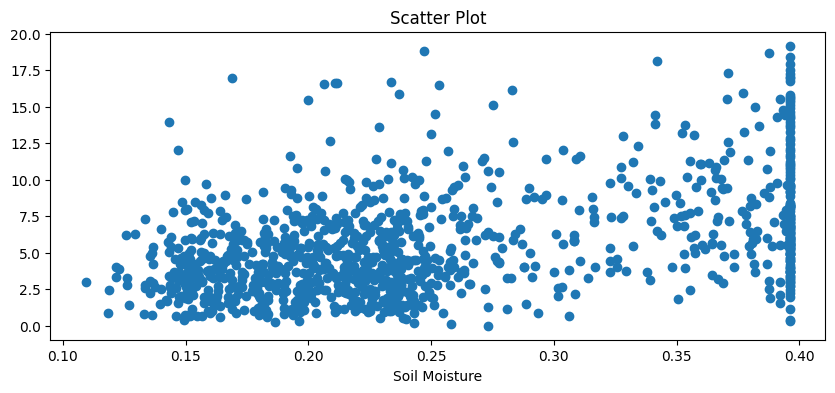

In [23]:
for i in range(1,len(Variables)):
    df1 = Data[f'{(Data.keys())[-1]}']
    df2 = Data[f'{Variables[i]}']
    print(f'scatter_plots for {Variables[i]} with {(Data.keys())[-1]}:')
    scatter_plots(df1,df2)
    print('\n')

## **Distribution Plot

In [24]:
def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

dist_plots for sp_inc_angle :


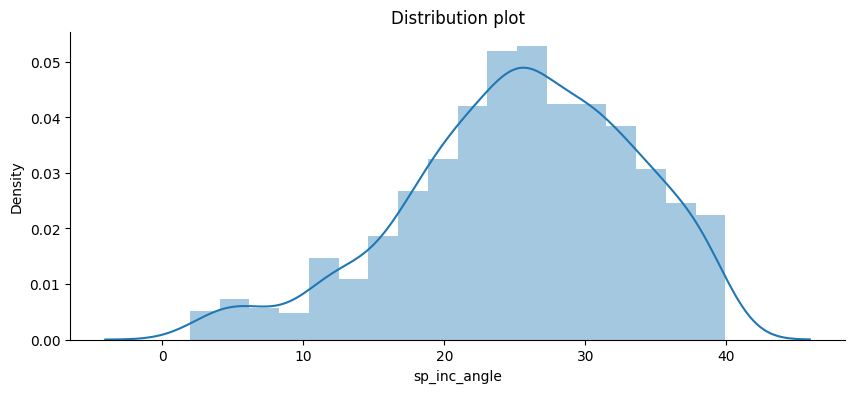



dist_plots for sp_rx_gain :


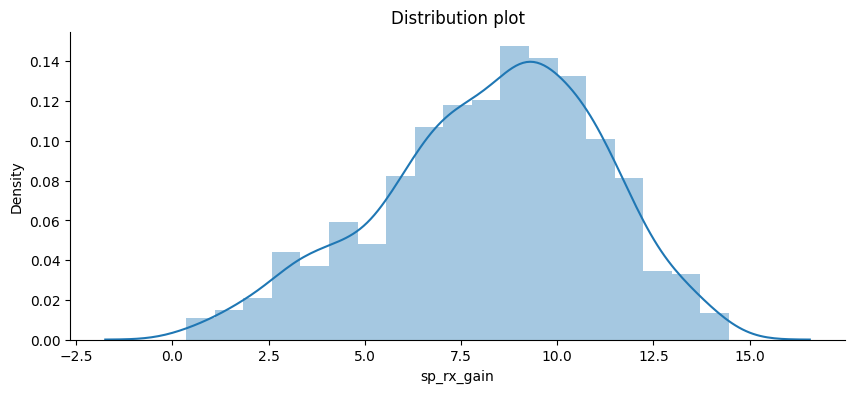



dist_plots for gps_tx_power_db_w :


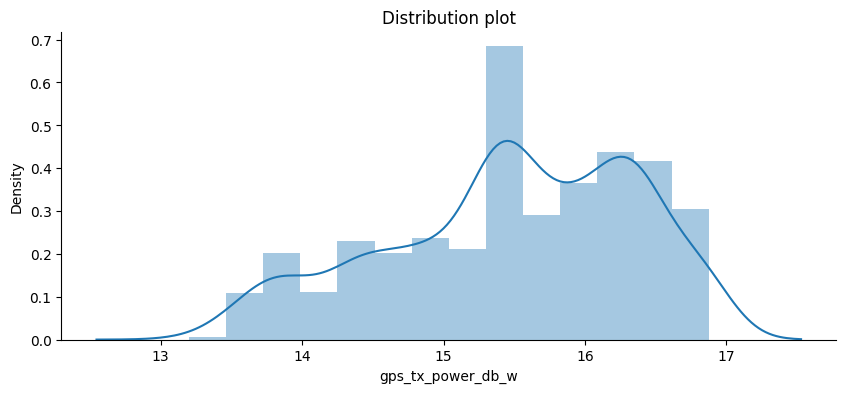



dist_plots for gps_ant_gain_db_i :


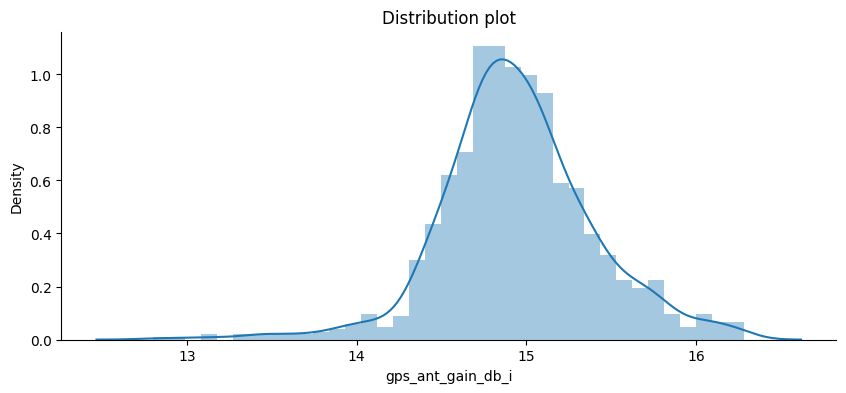



dist_plots for ddm_snr :


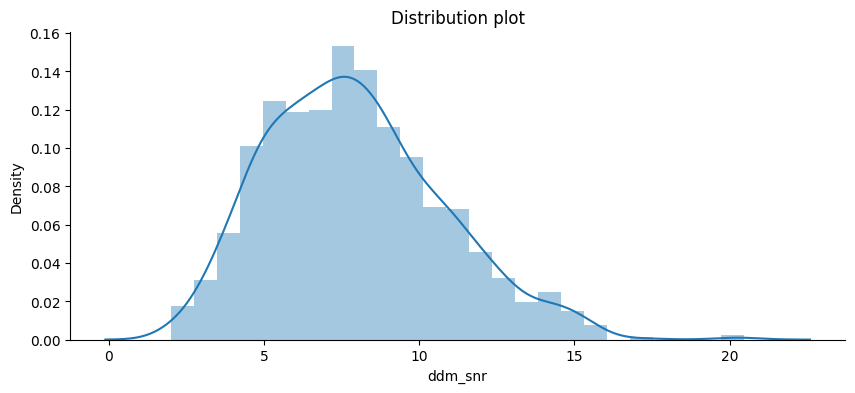



dist_plots for ddm_noise_floor :


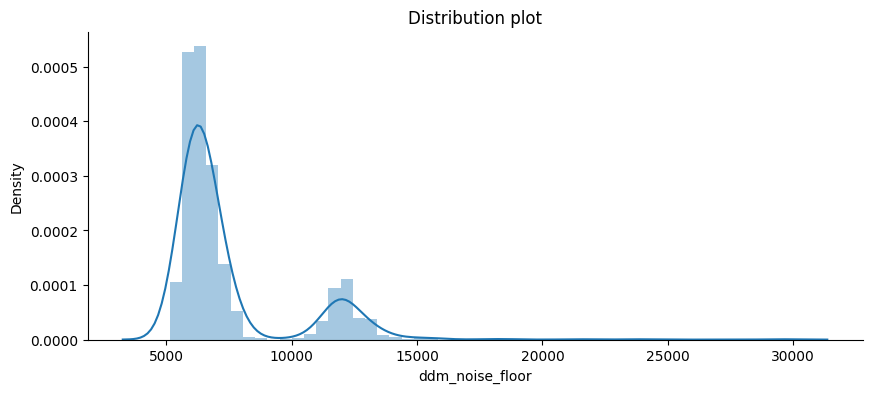



dist_plots for rx_to_sp_range :


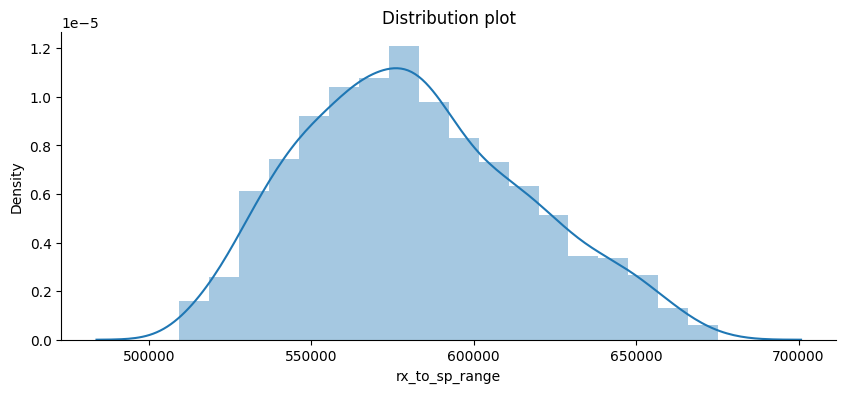



dist_plots for tx_to_sp_range :


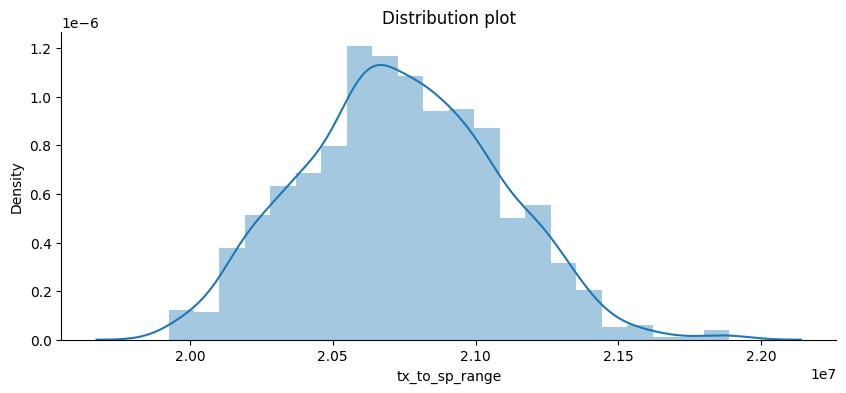



dist_plots for quality_flags :


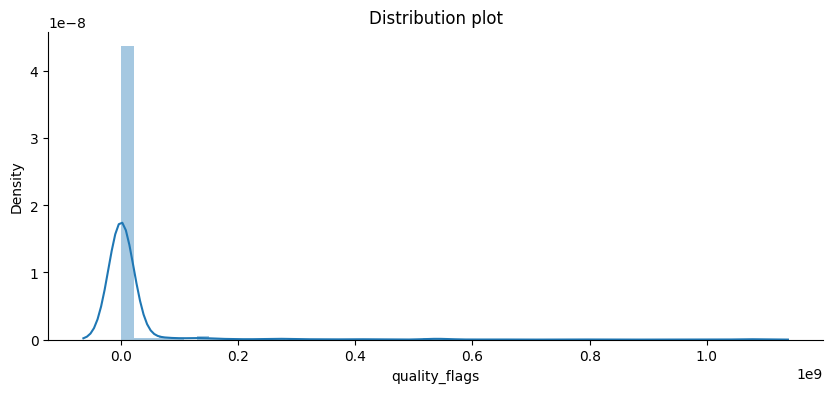



dist_plots for peak of power_analog :


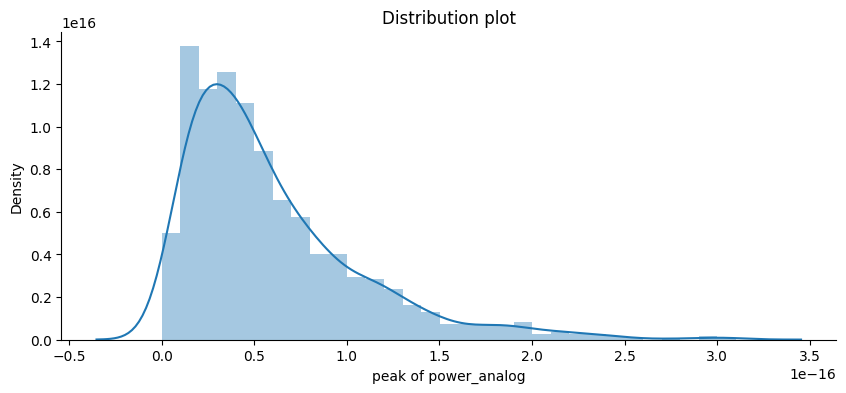



dist_plots for SR_eff :


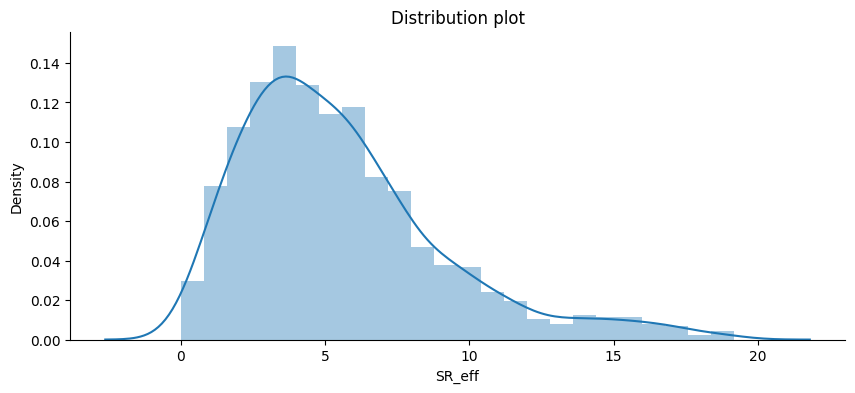

In [25]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'dist_plots for {Variables[i]} :')
    dist_plots(df)
    print('\n')

## **QQ plot

In [26]:
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()

qq_plots for sp_inc_angle :


<Figure size 1000x400 with 0 Axes>



qq_plots for sp_rx_gain :


<Figure size 1000x400 with 0 Axes>

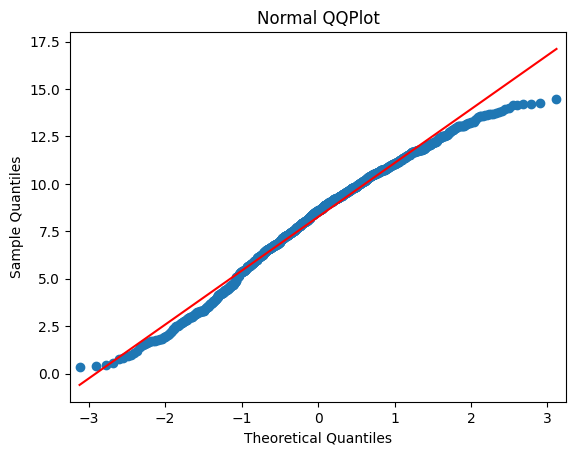



qq_plots for gps_tx_power_db_w :


<Figure size 1000x400 with 0 Axes>

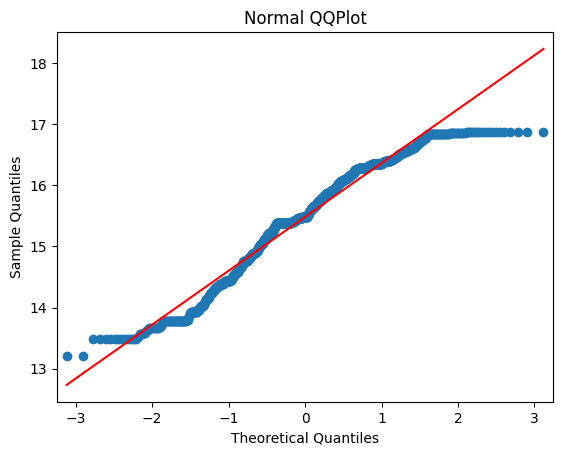



qq_plots for gps_ant_gain_db_i :


<Figure size 1000x400 with 0 Axes>

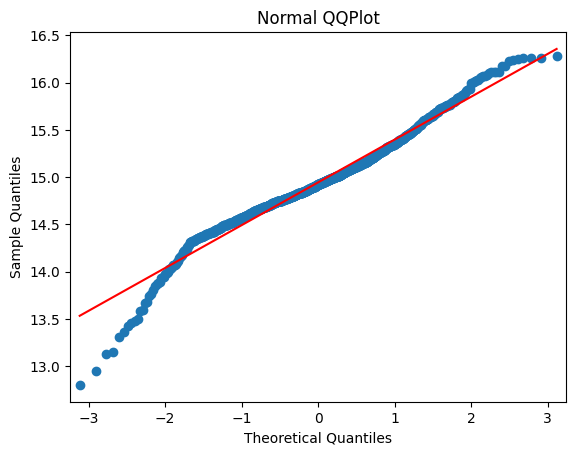



qq_plots for ddm_snr :


<Figure size 1000x400 with 0 Axes>

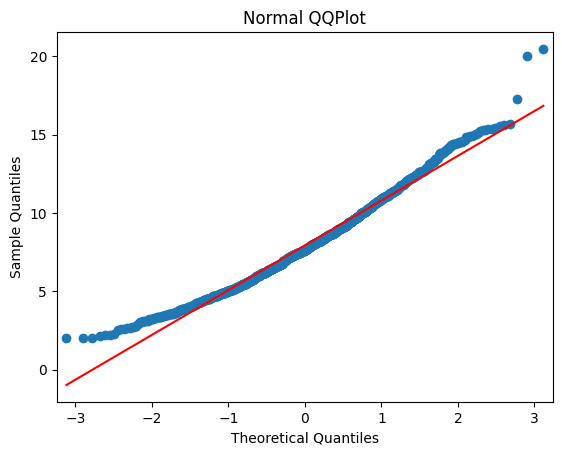



qq_plots for ddm_noise_floor :


<Figure size 1000x400 with 0 Axes>

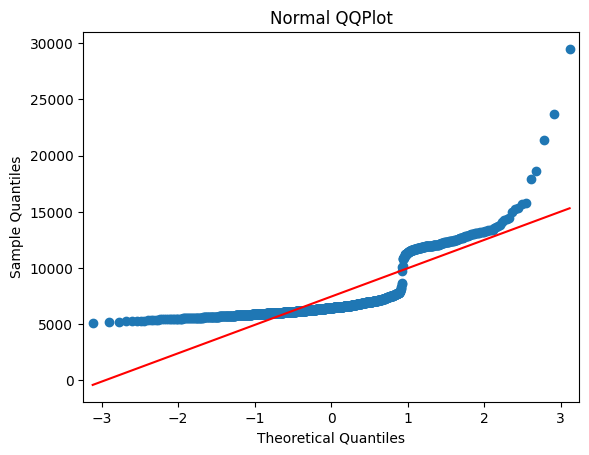



qq_plots for rx_to_sp_range :


<Figure size 1000x400 with 0 Axes>

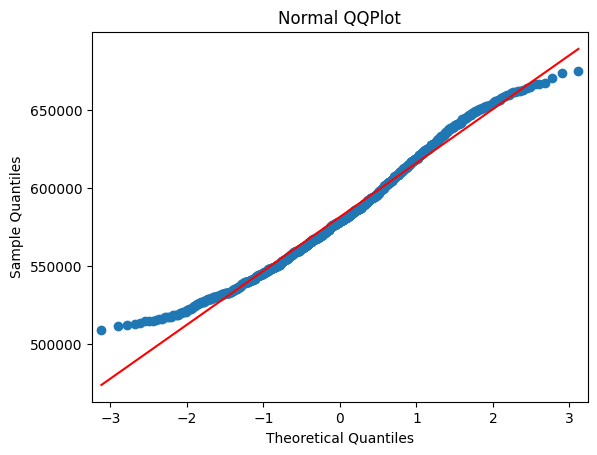



qq_plots for tx_to_sp_range :


<Figure size 1000x400 with 0 Axes>



qq_plots for quality_flags :


<Figure size 1000x400 with 0 Axes>



qq_plots for peak of power_analog :


<Figure size 1000x400 with 0 Axes>



qq_plots for SR_eff :


<Figure size 1000x400 with 0 Axes>

In [27]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    print(f'qq_plots for {Variables[i]} :')
    qq_plots(df)
    print('\n')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Outliers Removing</p>

+ Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.  
+ It increases the error variance and reduces the power of statistical tests.    
+ If the outliers are non-randomly distributed, they can decrease normality. 
+ Most machine learning algorithms do not work well in the presence of outlier. 
+ So it is desirable to detect and remove outliers.    
+ They can also impact the basic assumption of Regression and other statistical models.  

+ There are some techniques used to deal with outliers.
  + Deleting observations.    
  + Transforming values. 
  + Imputation.  
  + Separately treating 

# **Deleting observations: 

+ We delete outlier values if it is due to data entry error, data processing error 
+ Or outlier observations are very small in numbers. 
+ We can also use trimming at both ends to remove outliers. 
+ But deleting the observation is not a good idea when we have small dataset.

In [28]:
df_1 = Data.copy()
df_1.head()

sp_inc_angle  sp_rx_gain  gps_tx_power_db_w  gps_ant_gain_db_i    ddm_snr  \
0     10.583468   10.460383          16.843000          14.833932   7.188014   
1     36.991842    9.856939          15.382000          15.474989  10.031906   
2     16.143141   12.174973          15.465000          14.681092   7.780371   
3     21.381812   13.217389          16.016638          14.749246   9.519363   
4     26.620483   14.259805          16.568276          14.817400  11.258355   

   ddm_noise_floor  rx_to_sp_range  tx_to_sp_range  quality_flags  \
0      5943.125500   540114.000000    2.024588e+07   2.693130e+05   
1      7866.261300   632412.500000    2.116108e+07   1.344870e+08   
2      6217.302123   535373.133333    2.031021e+07   1.344966e+08   
3      6148.437539   559635.083908    2.049498e+07   6.739893e+07   
4      6079.572955   583897.034483    2.067974e+07   3.012336e+05   

   peak of power_analog    SR_eff        Date  SMAP_Soil_Moisture  
0          3.160071e-17  2.056695  01-01-2020            0.241491  
1          7.750842e-17  6.179150  02-01-2020            0.271814  
2          6.950786e-17  4.059113  03-01-2020            0.292451  
3          1.002697e-16  5.341512  04-01-2020            0.278970  
4          1.310316e-16  6.623910  05-01-2020            0.286393

In [29]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

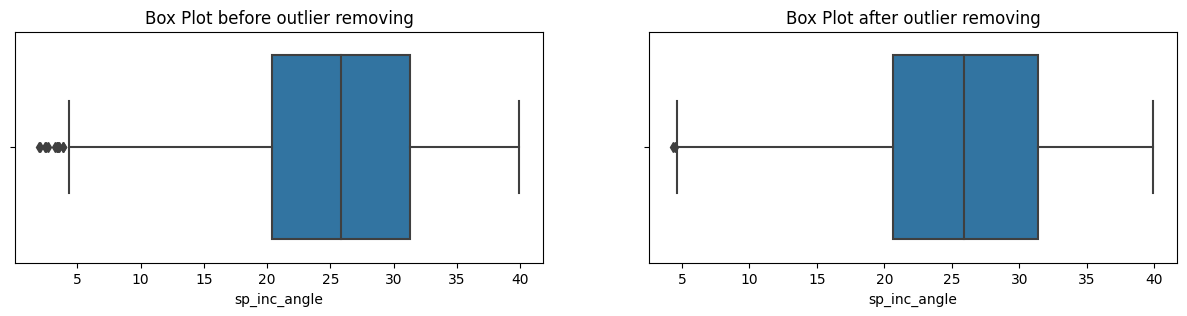

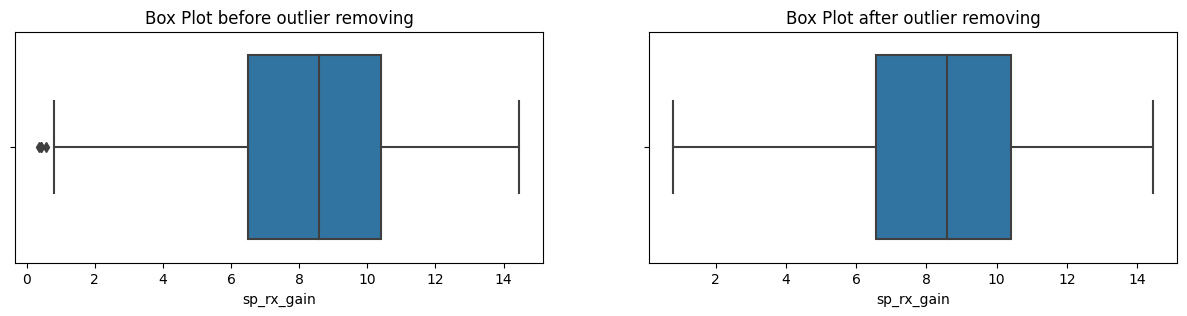

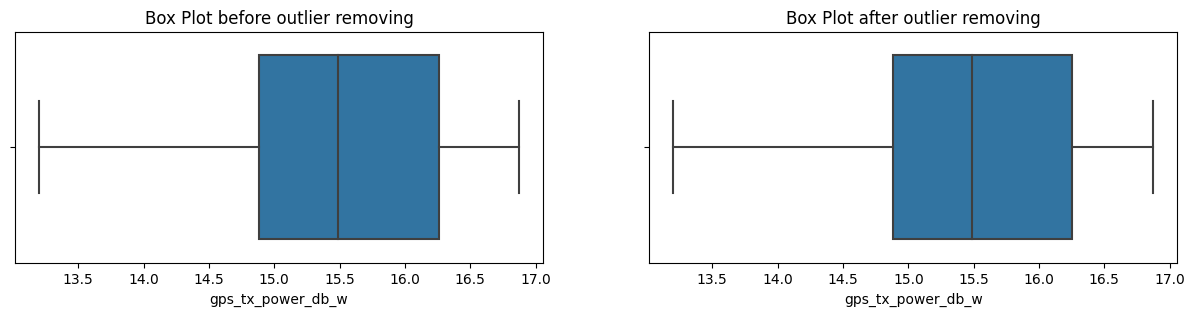

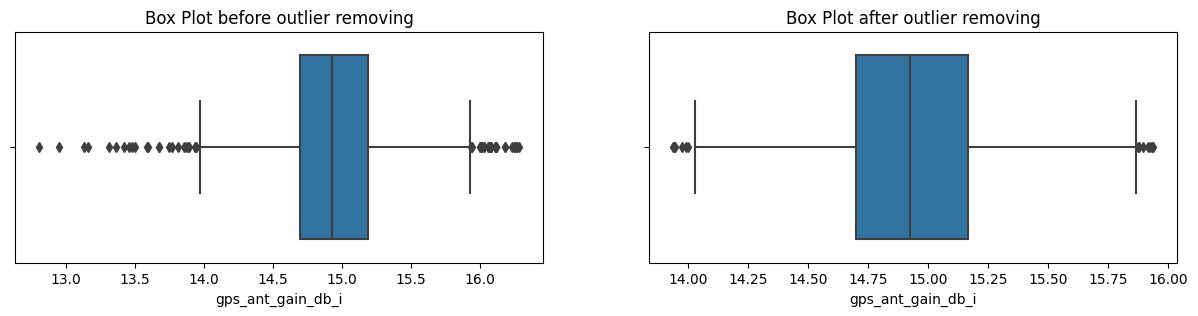

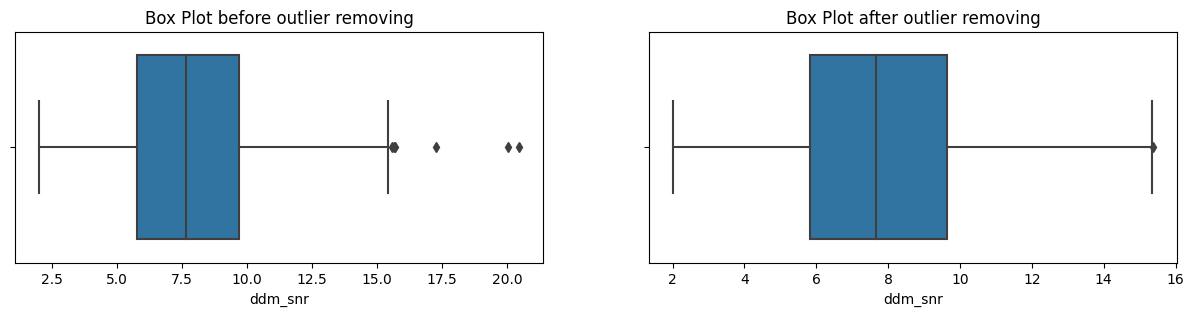

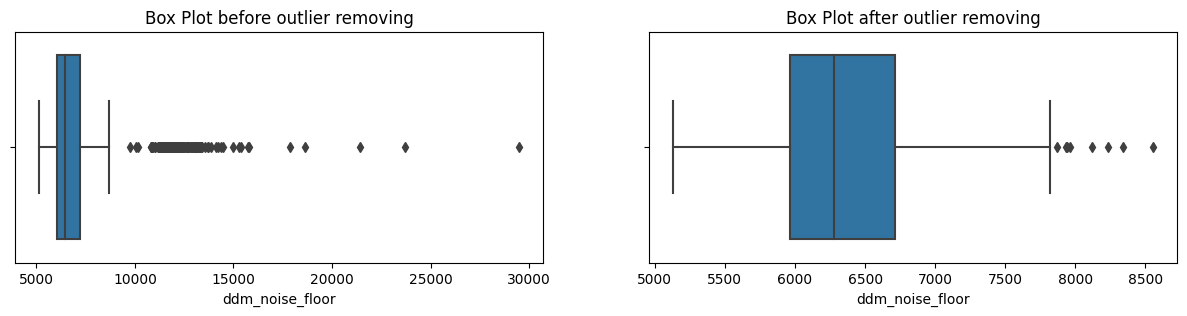

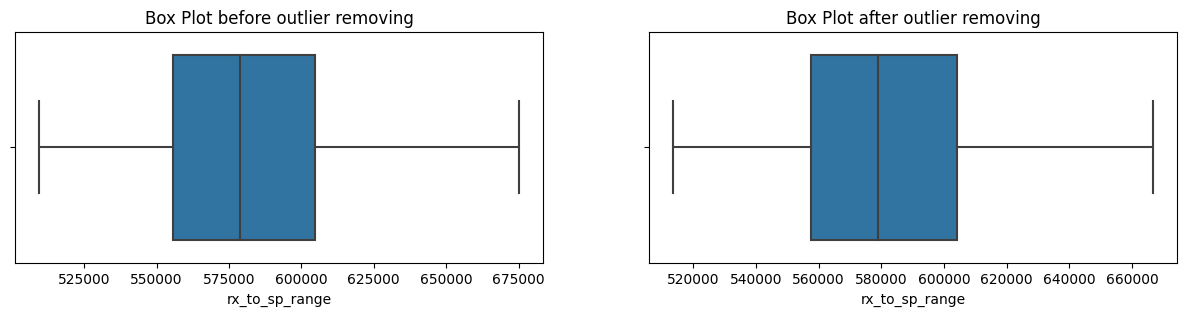

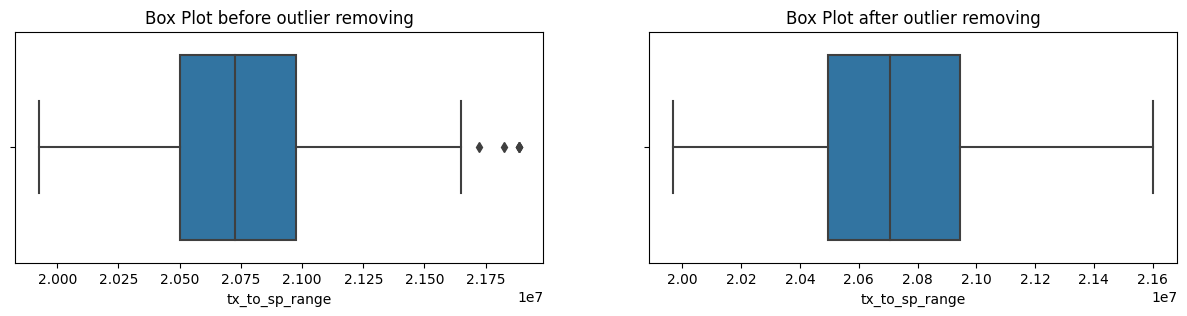

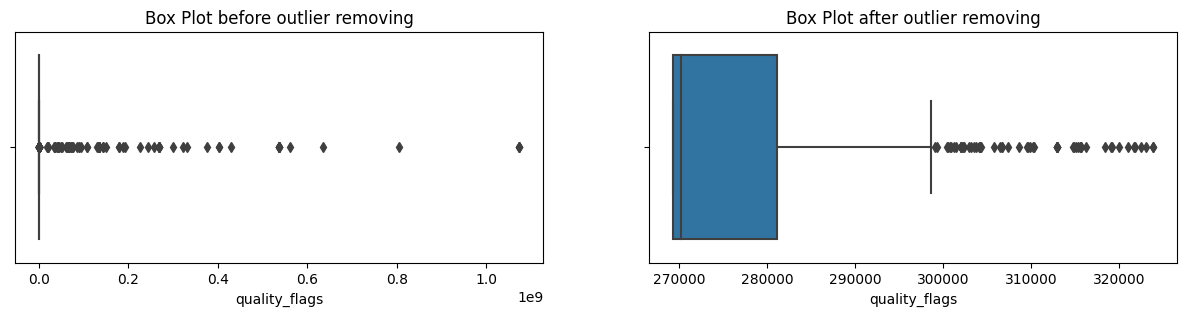

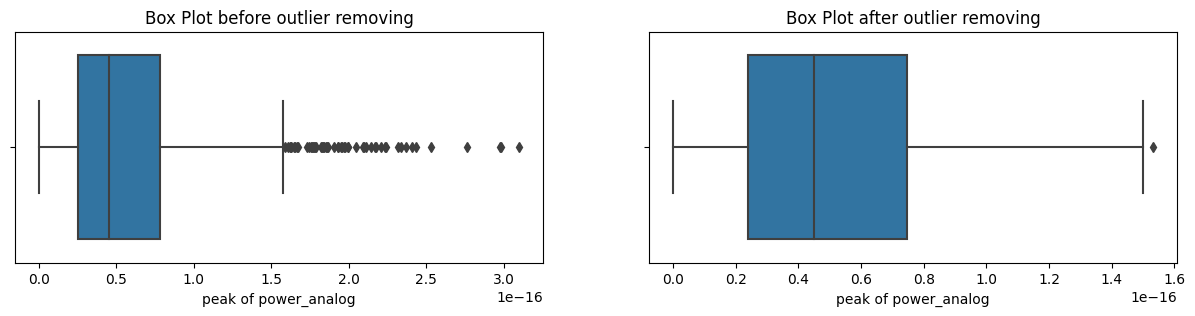

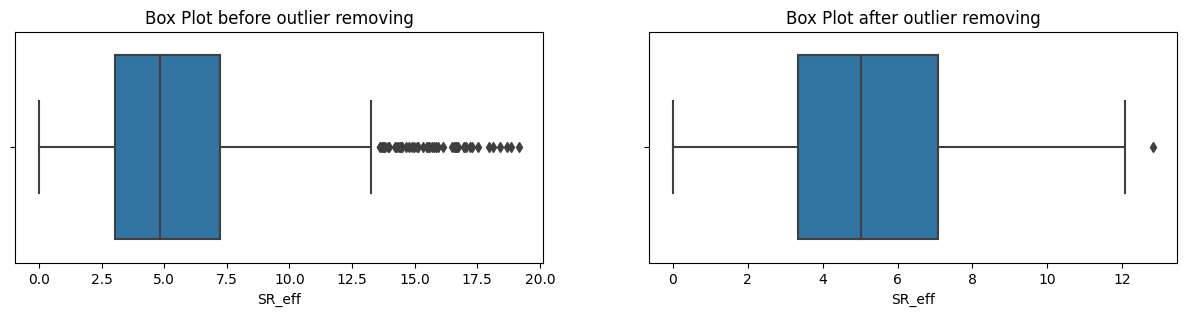

In [30]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title(f"Box Plot before outlier removing")
    plt.subplot(1,2,2)
    drop_outliers(df_1, f'{Variables[i]}')
    sns.boxplot(df_1[f'{Variables[i]}'])
    plt.title("Box Plot after outlier removing")
    plt.show()

# **Transforming values:
+ Transforming variables can also eliminate outliers. 
+ These transformed values reduces the variation caused by extreme values.
  + Scalling     
  + Log transformation
  + Cube Root Normalization  
  + Box-Cox transformation
+ These techniques convert values in the dataset to smaller values. 
+ If the data has to many extreme values or skewed, this method helps to make your data normal.     
+ But These technique not always give you the best results. 
+ There is no lose of data from these methods.    
+ In all these method boxcox transformation gives the best result

## **Scaling

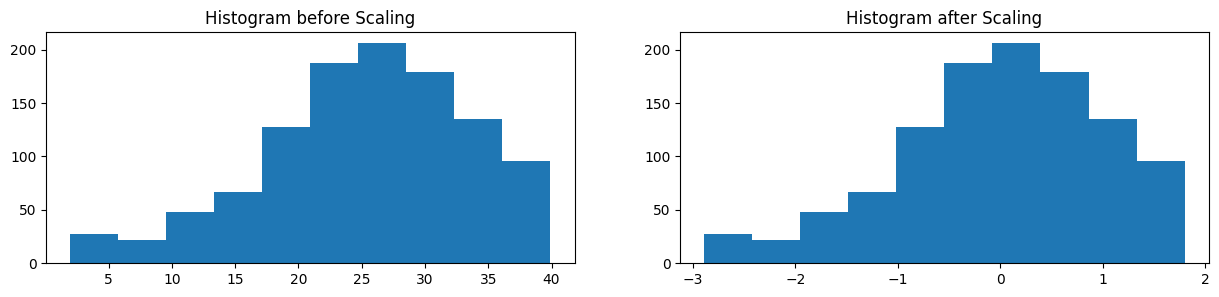

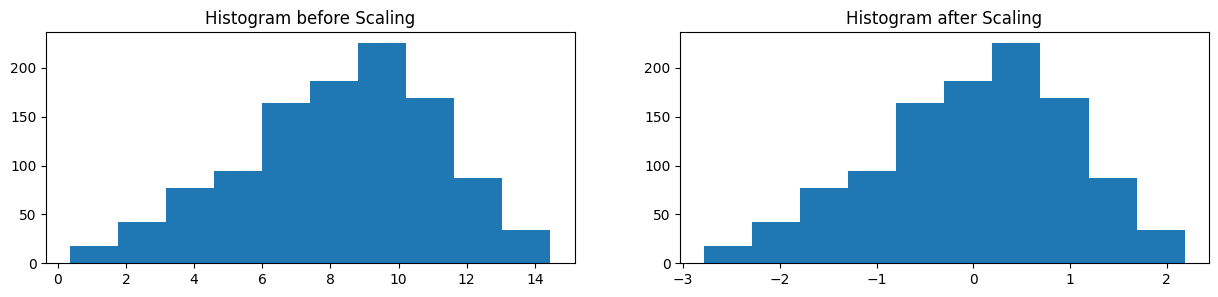

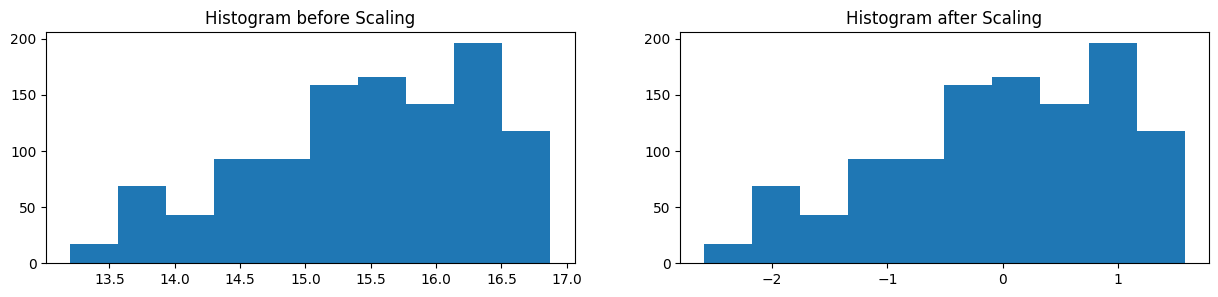

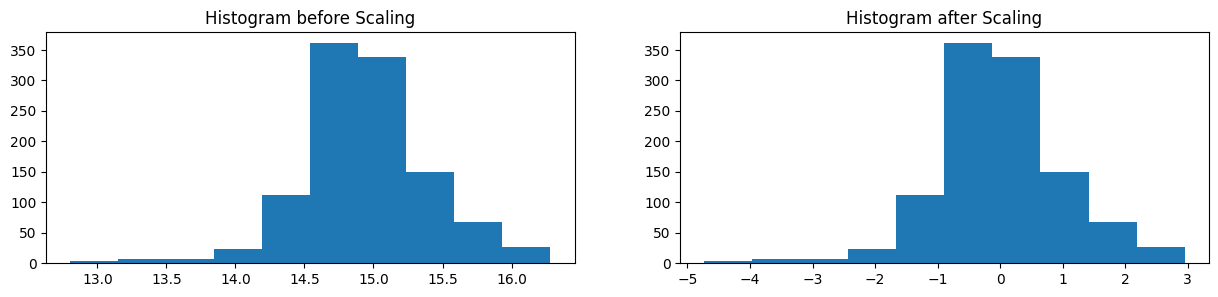

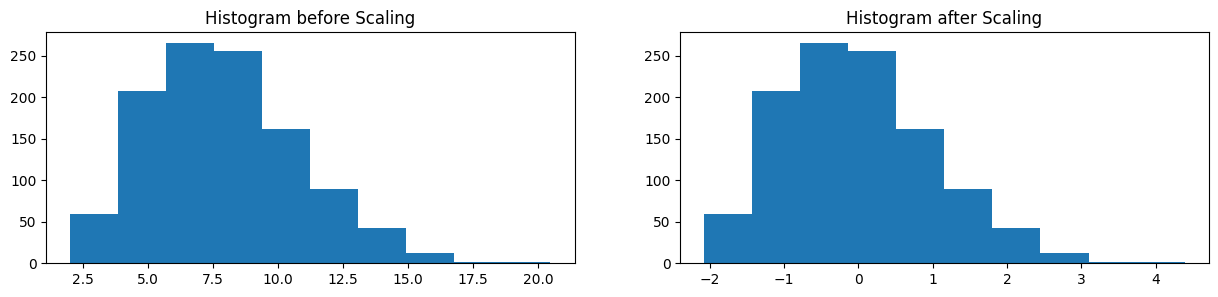

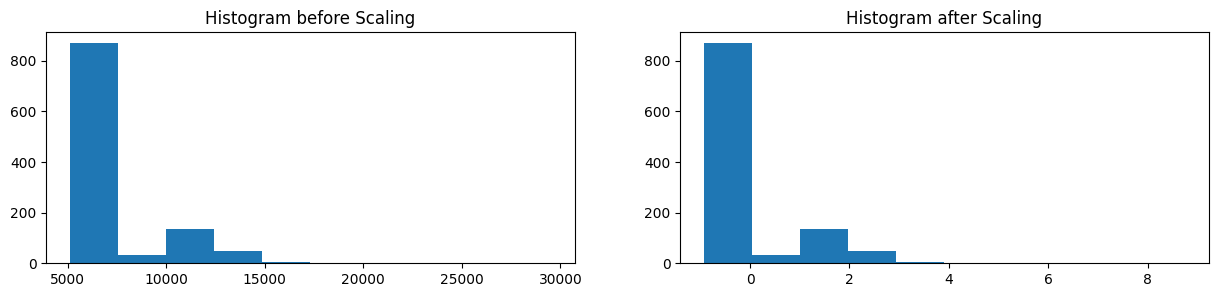

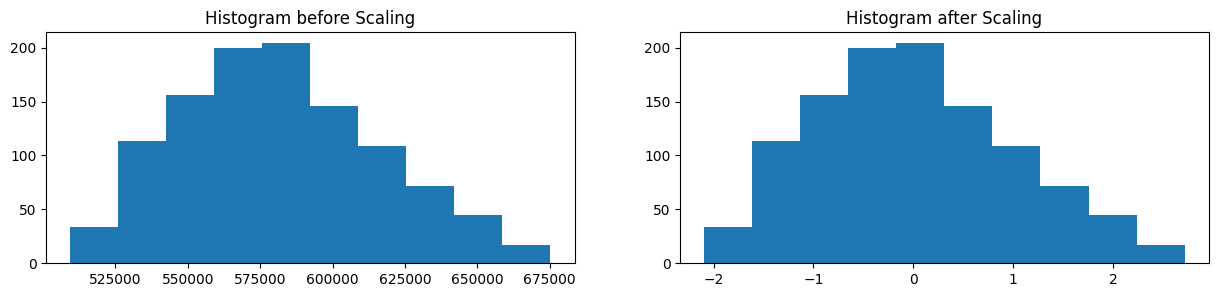

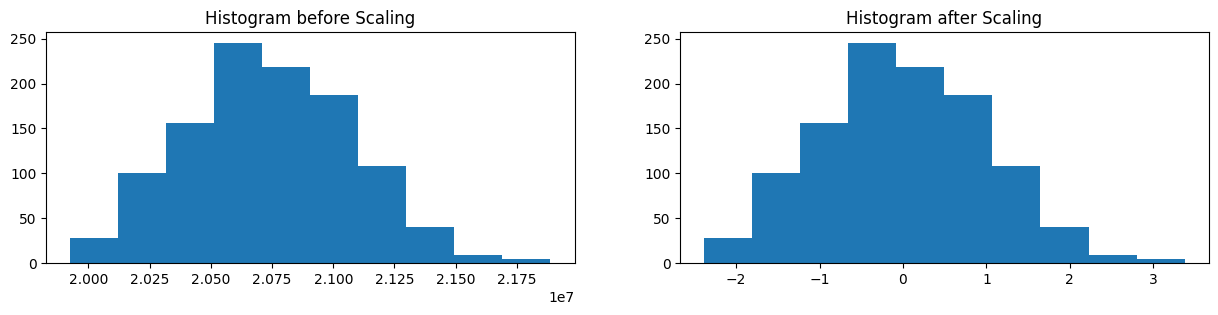

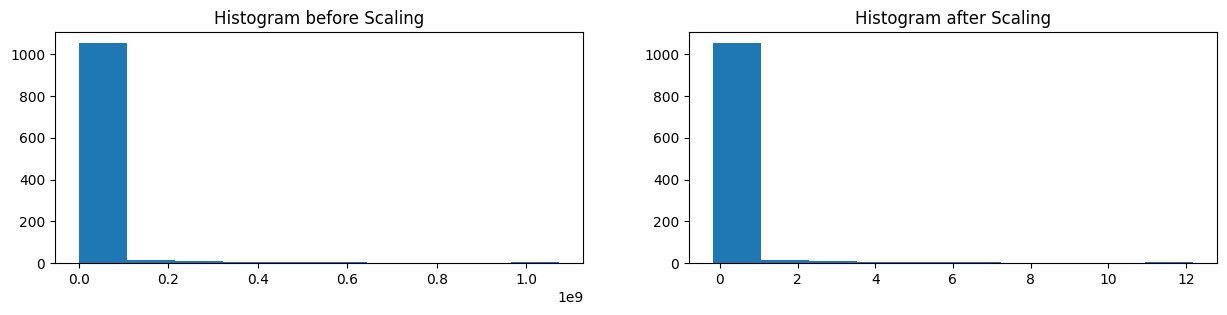

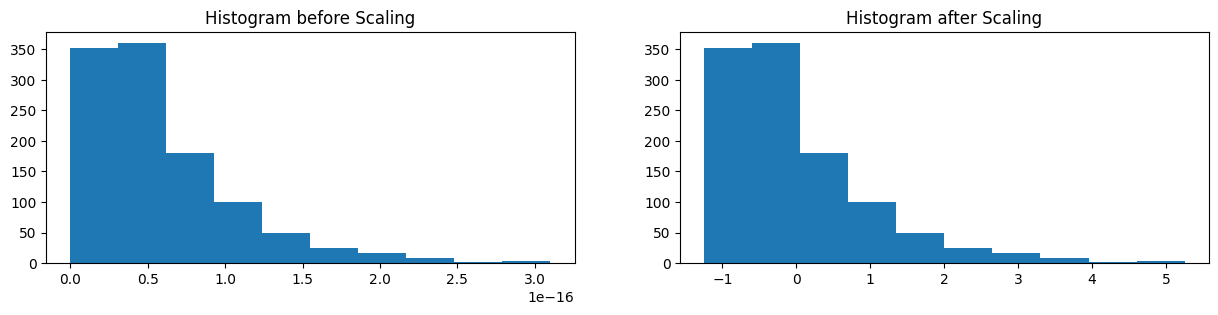

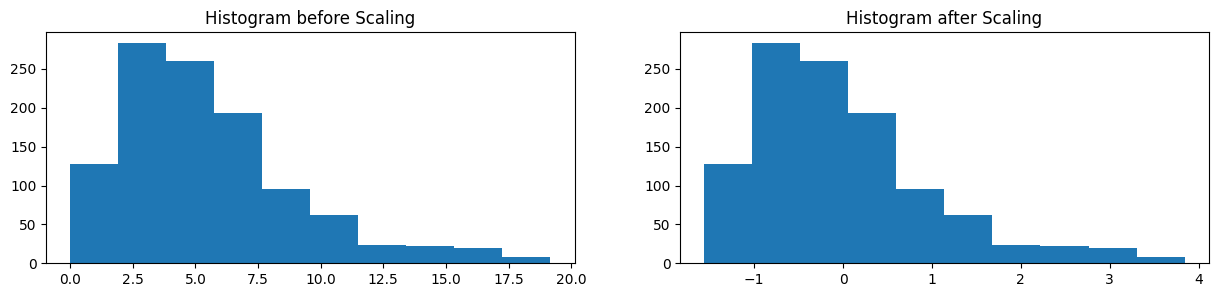

In [31]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    plt.hist(df)
    plt.title("Histogram before Scaling")
    
    plt.subplot(1,2,2)
    scaler = preprocessing.StandardScaler()
    df = scaler.fit_transform(np.array(df).reshape(-1,1))
    plt.hist(df)
    plt.title("Histogram after Scaling")
    plt.show()

## **Log Transformation

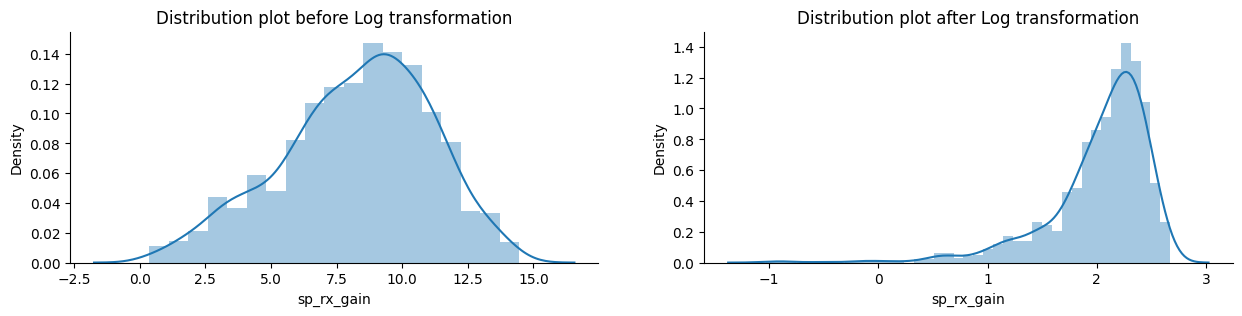

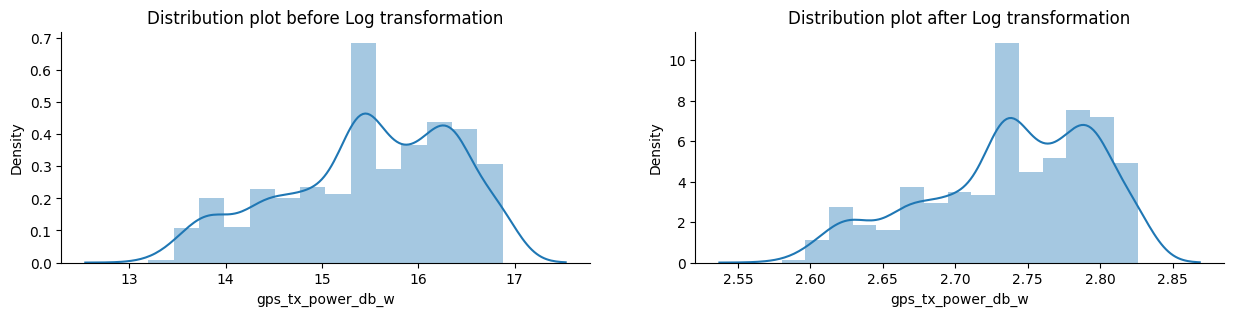

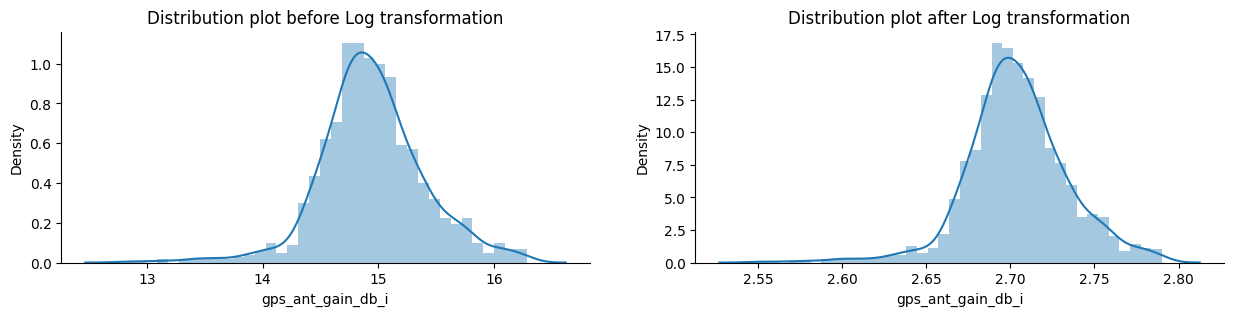

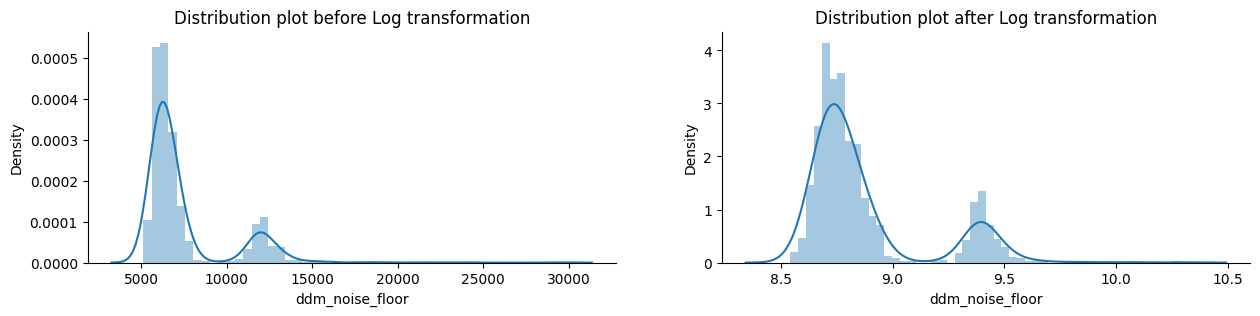

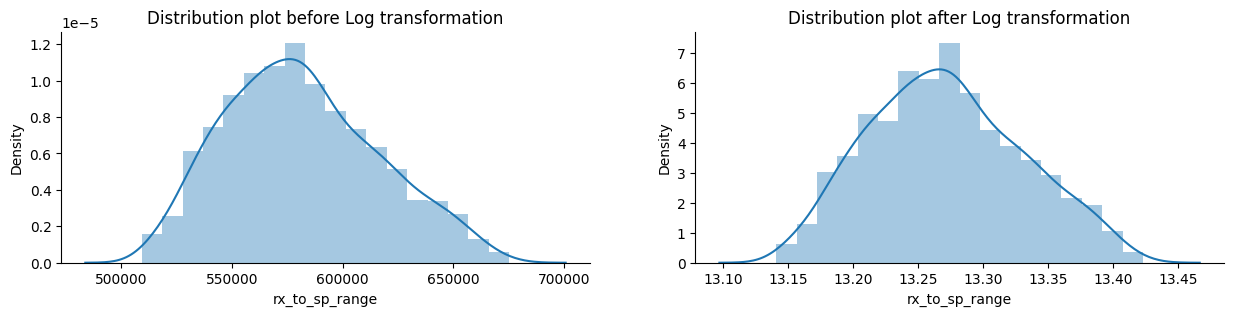

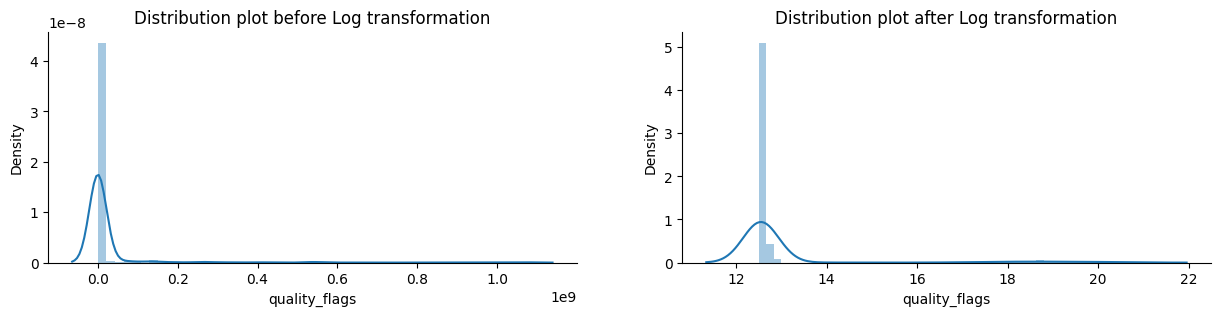

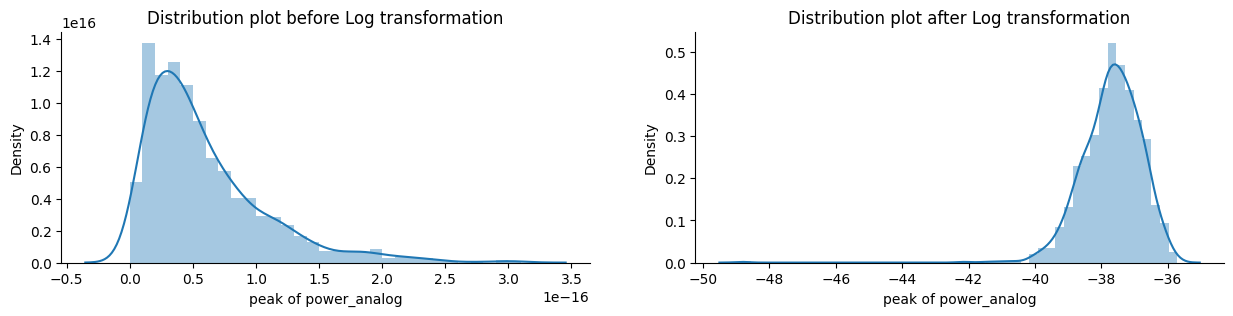

In [32]:
for i in range(1,len(Variables)-1):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.distplot(df)
    plt.title("Distribution plot before Log transformation")
    sns.despine()
    
    plt.subplot(1,2,2)    
    df = np.log(df)
    sns.distplot(df)
    plt.title("Distribution plot after Log transformation")
    sns.despine()
    plt.show()

## **Cube Root Transformation

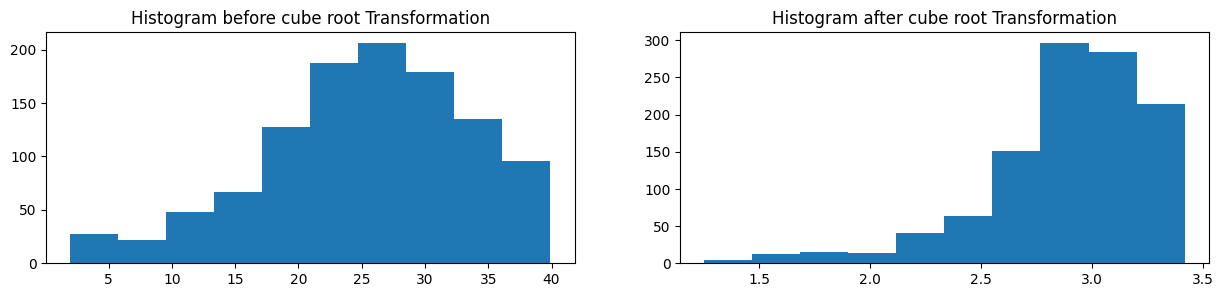

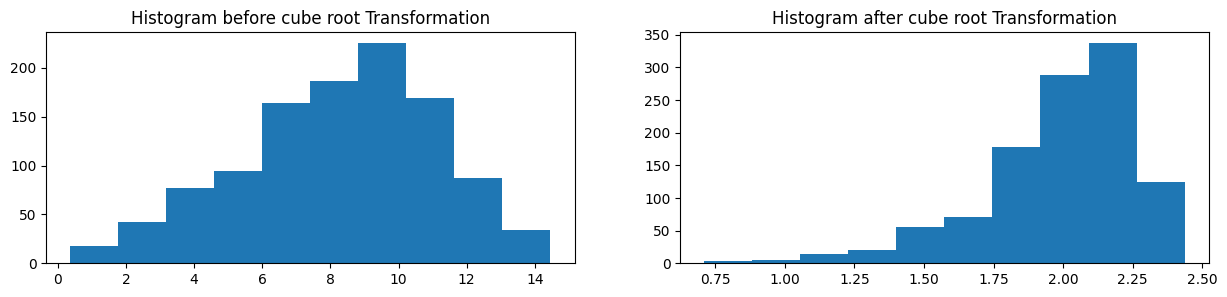

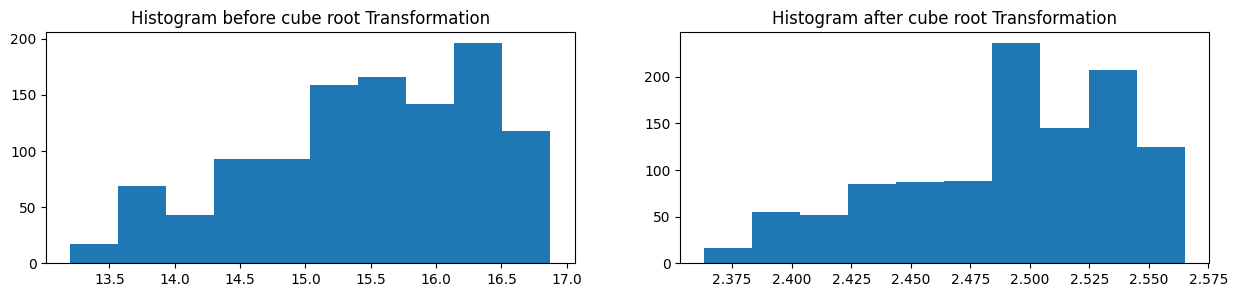

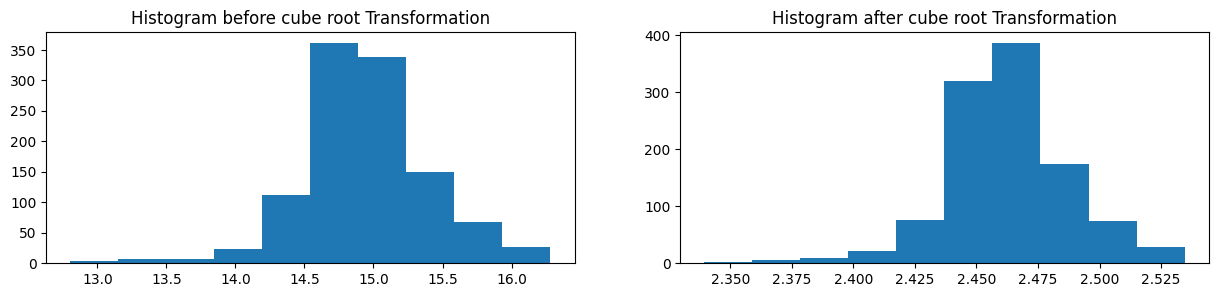

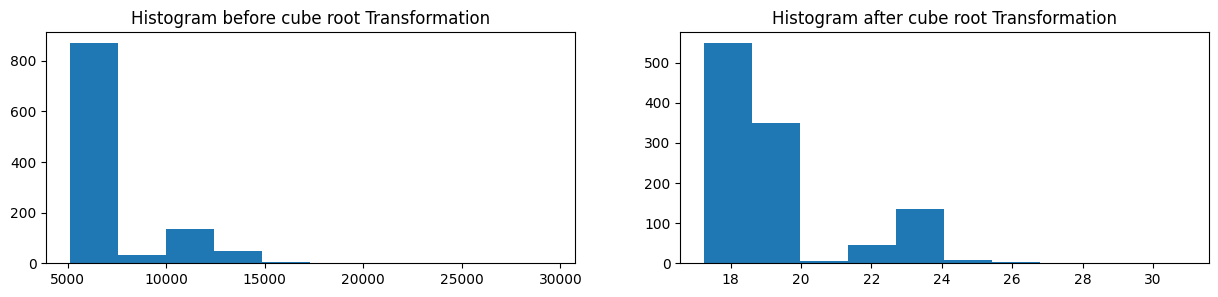

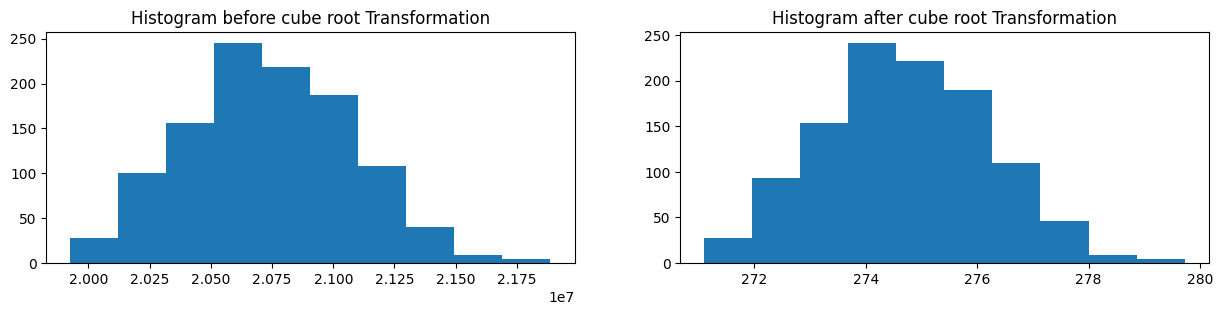

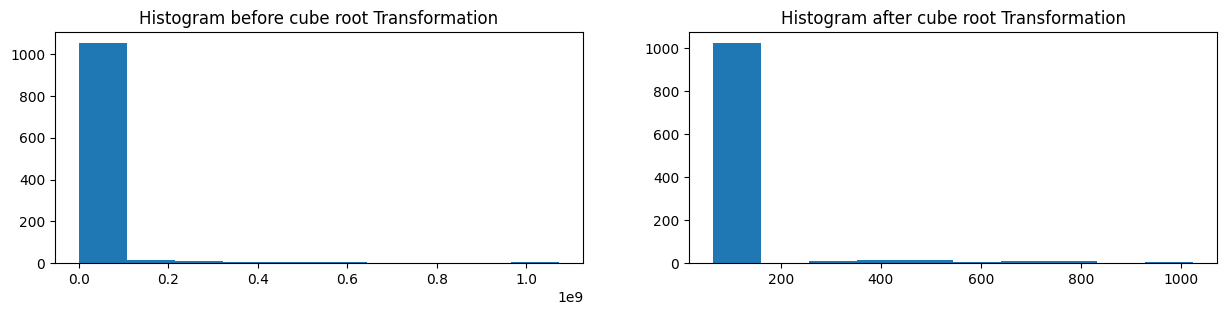

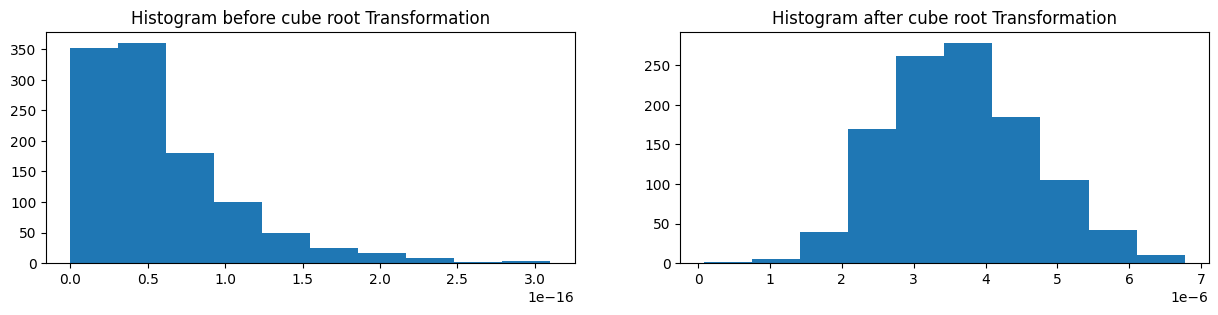

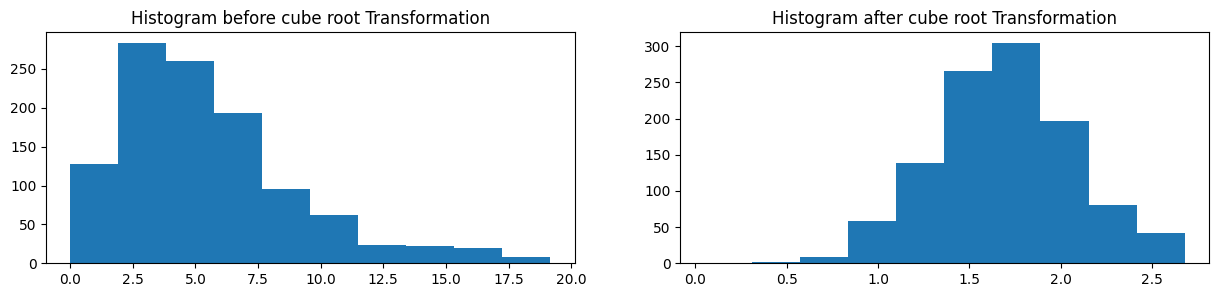

In [33]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    plt.hist(df)
    plt.title("Histogram before cube root Transformation")
    df = (df**(1/3))
    plt.subplot(1,2,2)
    plt.hist(df)
    plt.title("Histogram after cube root Transformation")
    plt.show()

## **Box - Transformation

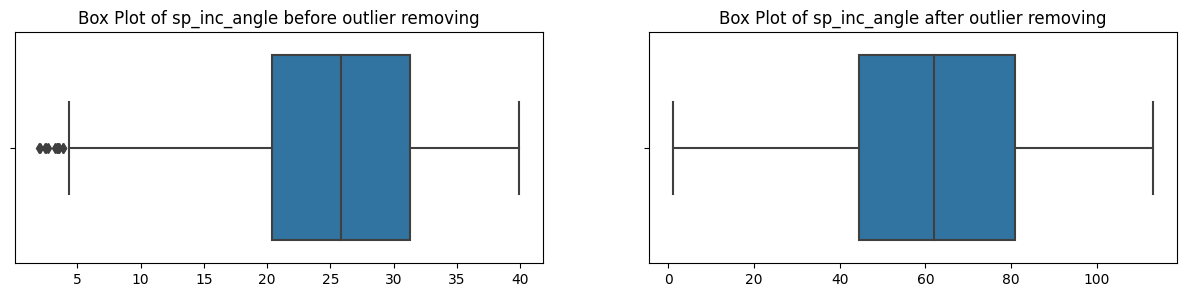

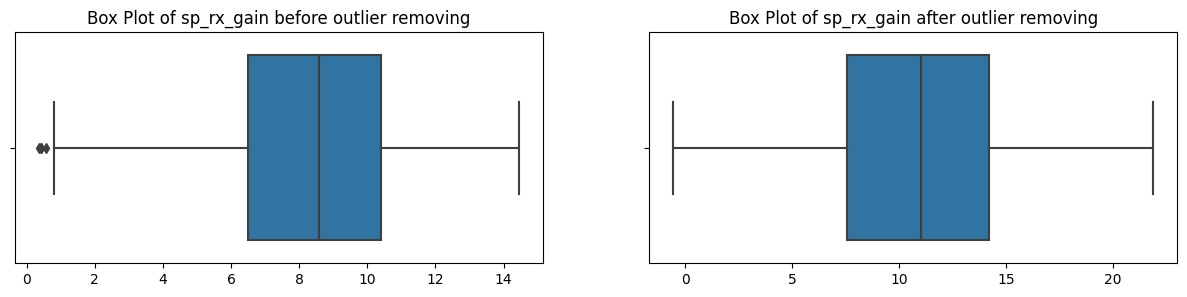

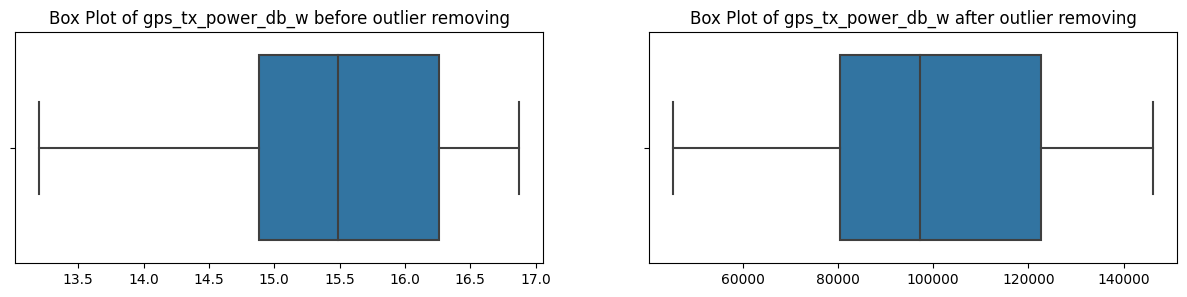

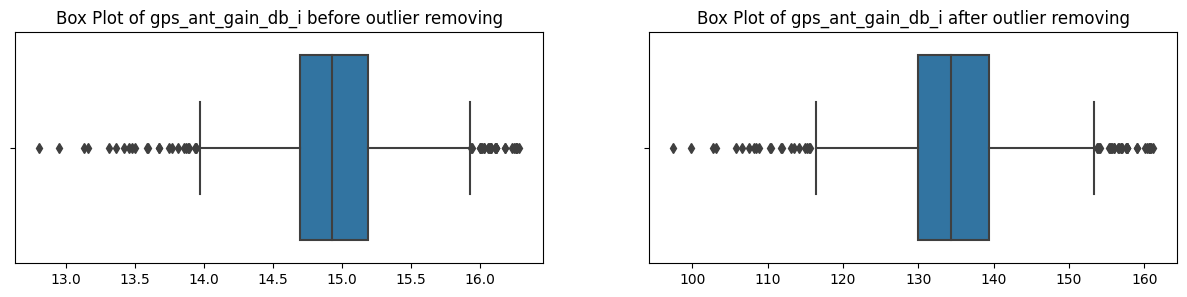

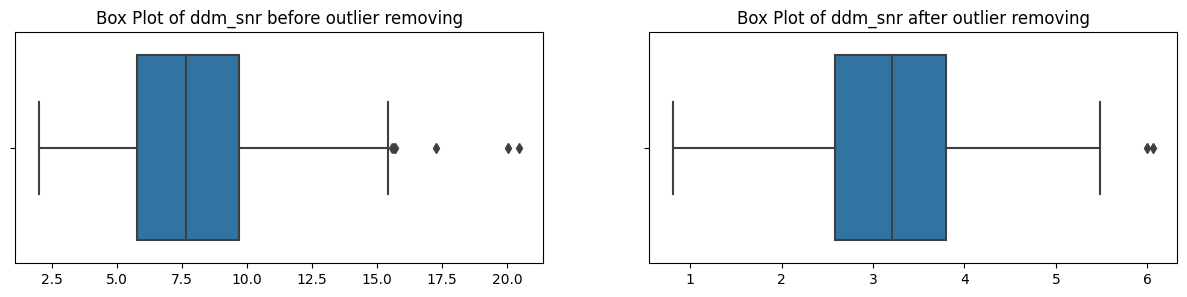

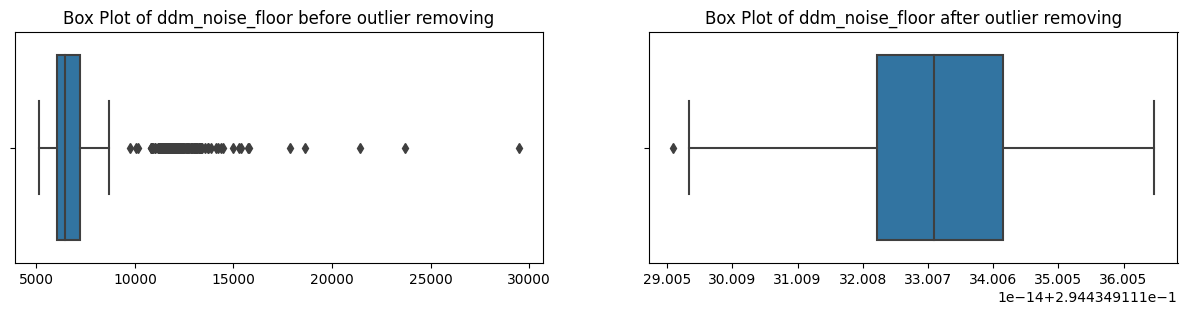

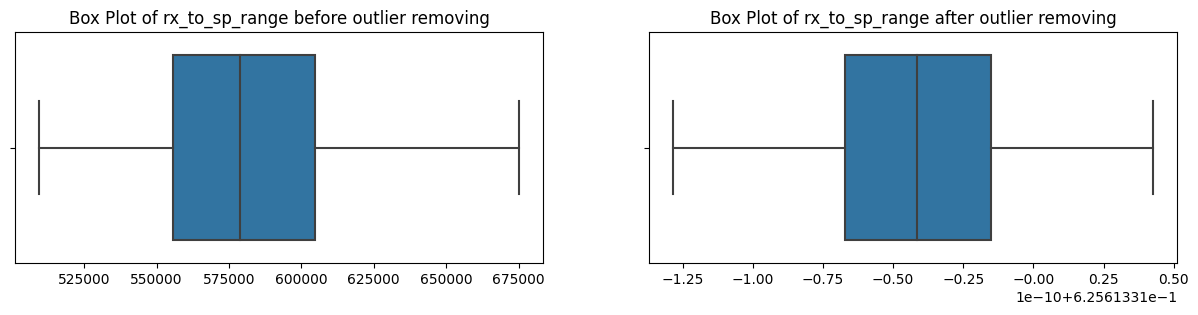

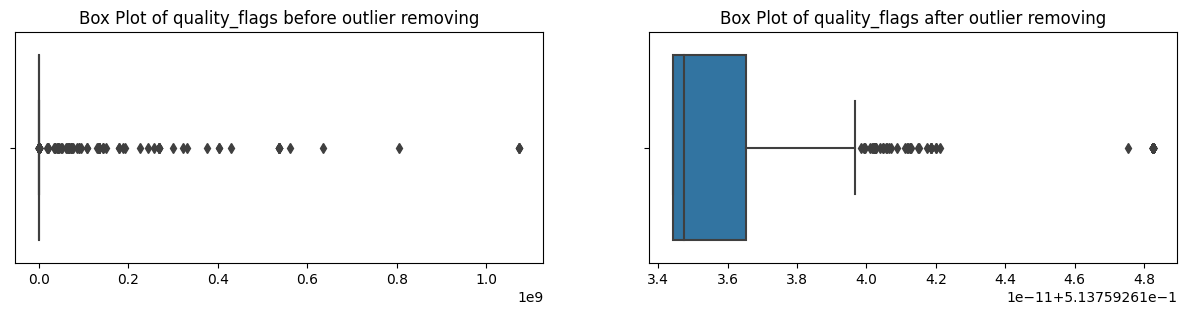

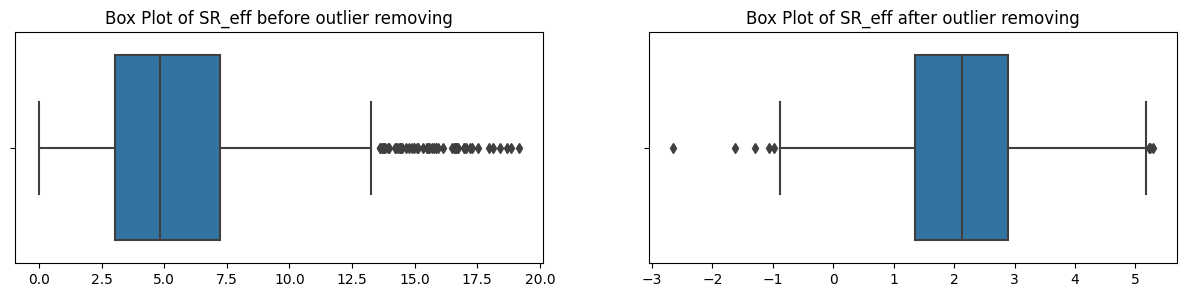

In [34]:
for i in range(len(Variables)):
    dfe = Data[f'{Variables[i]}']
    dfe = pd.DataFrame(dfe)
    dfe = np.array(dfe[dfe>0]).flatten()
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(dfe)
    plt.title(f"Box Plot of {Variables[i]} before outlier removing")
    dfe,fitted_lambda = scipy.stats.boxcox(dfe,lmbda=None)
    plt.subplot(1,2,2)
    sns.boxplot(dfe)
    plt.title(f"Box Plot of {Variables[i]} after outlier removing")
    plt.show()

# **Imputation
+ Like imputation of missing values, we can also impute outliers. 
+ We can use mean, median, zero value in this methods. 
+ Since we imputing there is no loss of data. 
+ Here median is appropriate because it is not affected by outliers.

## **Mean Imputation

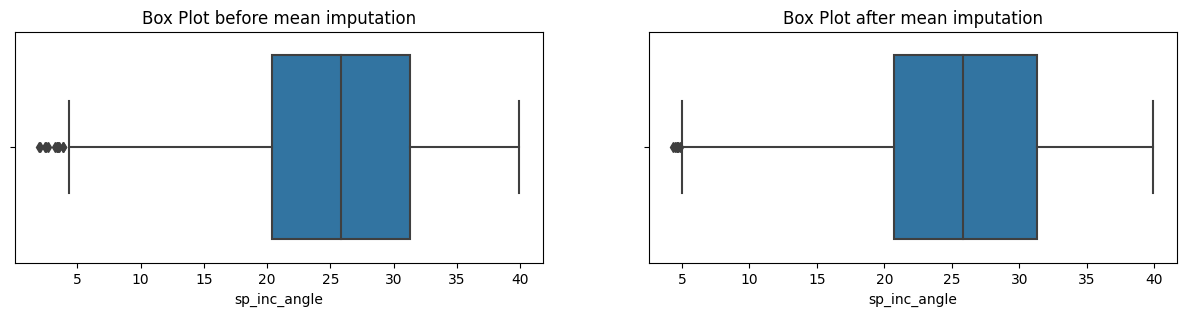

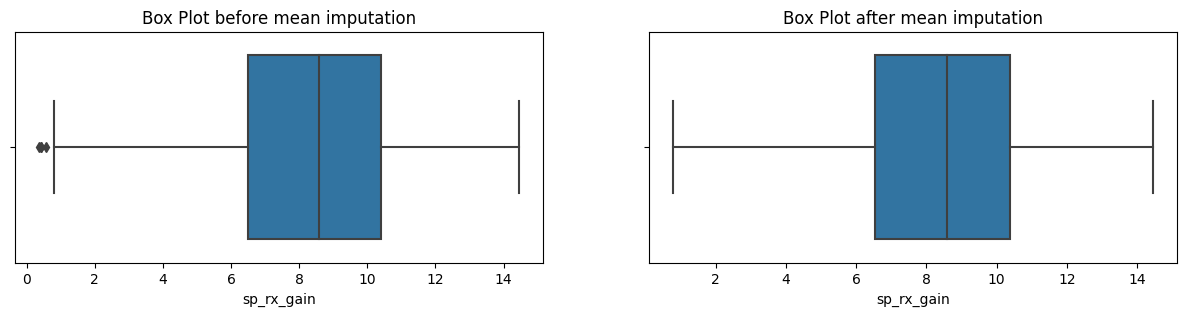

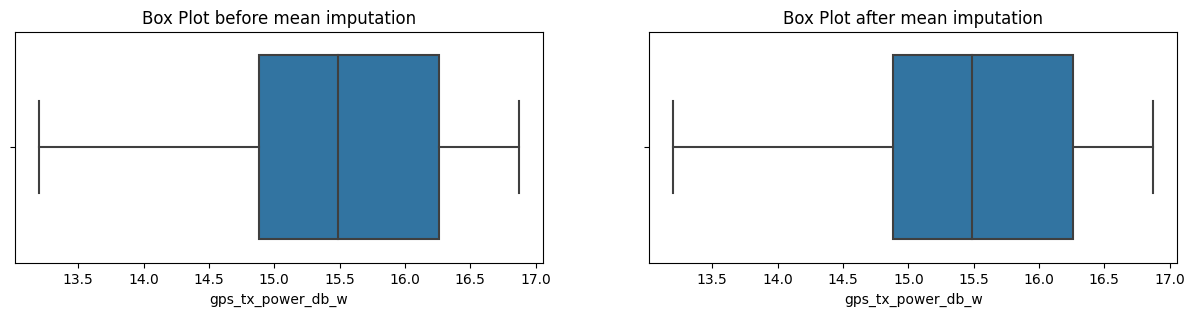

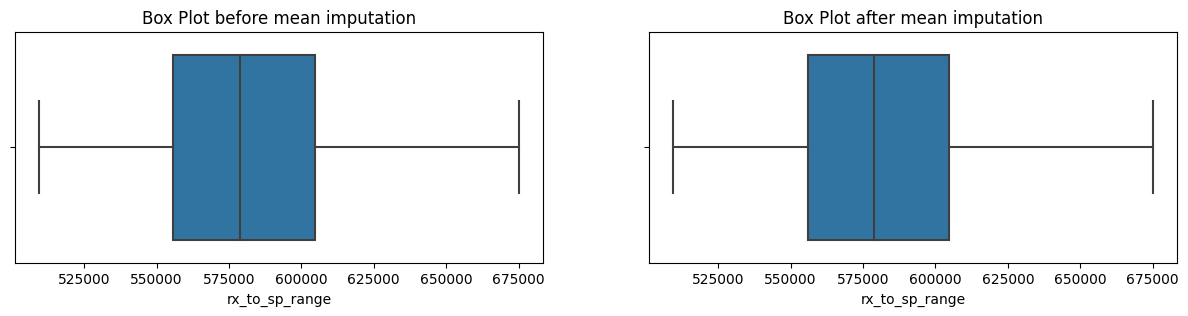

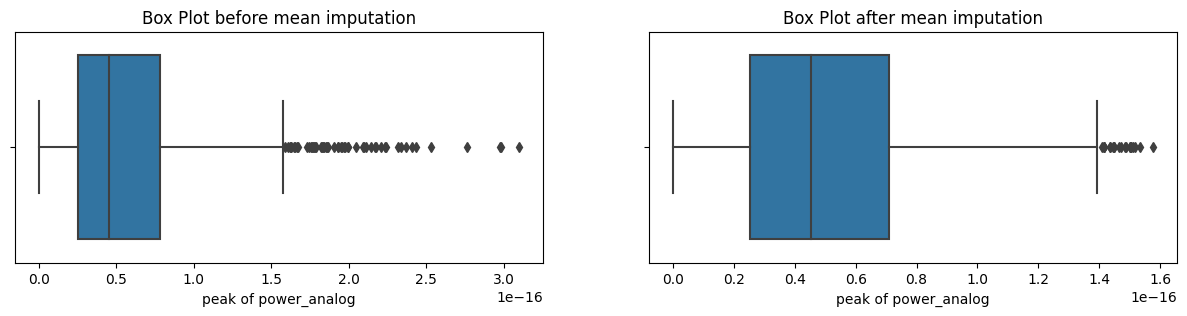

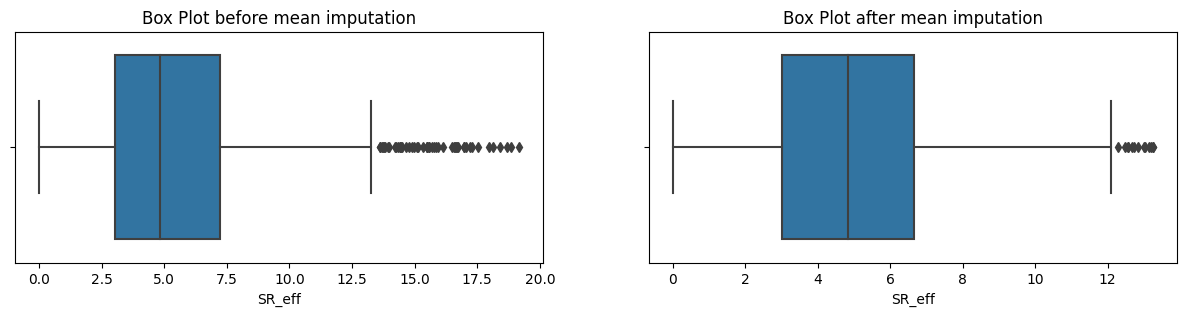

In [35]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before mean imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.mean(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, m)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after mean imputation")
    plt.show()   

## **Median Imputation

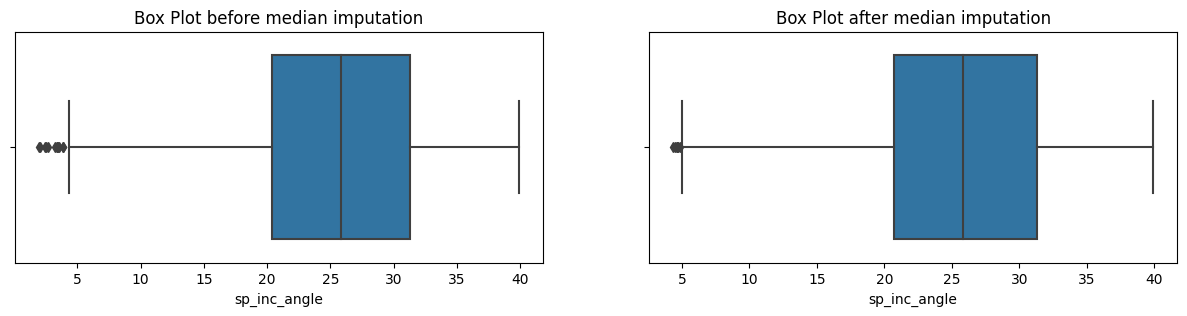

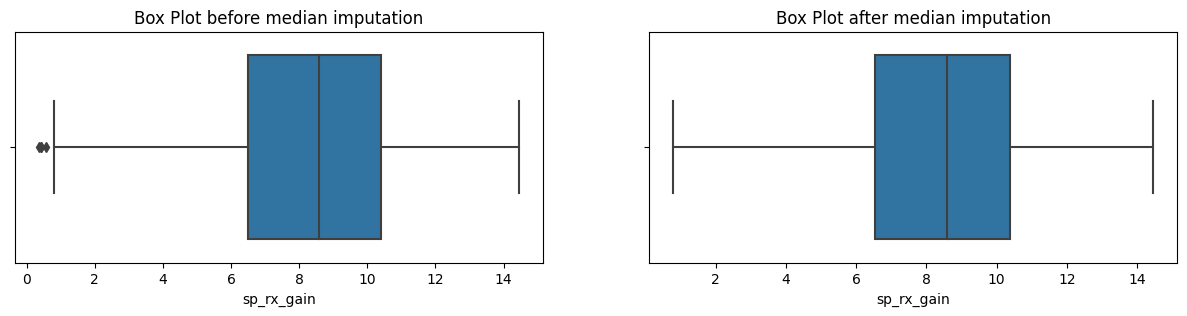

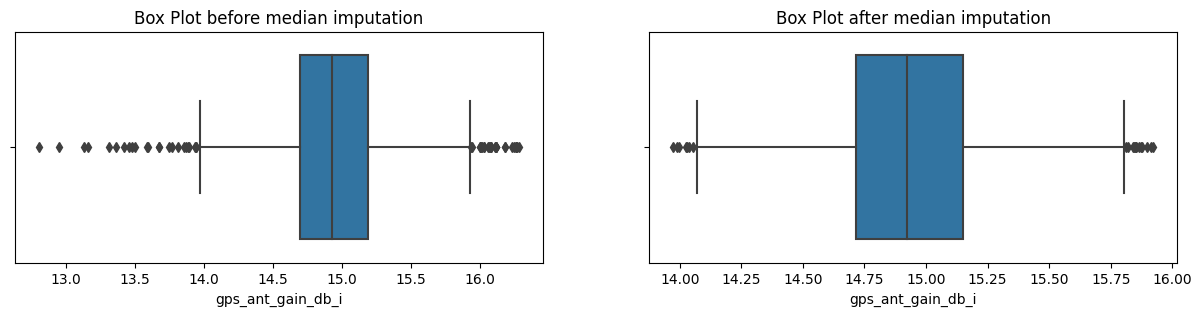

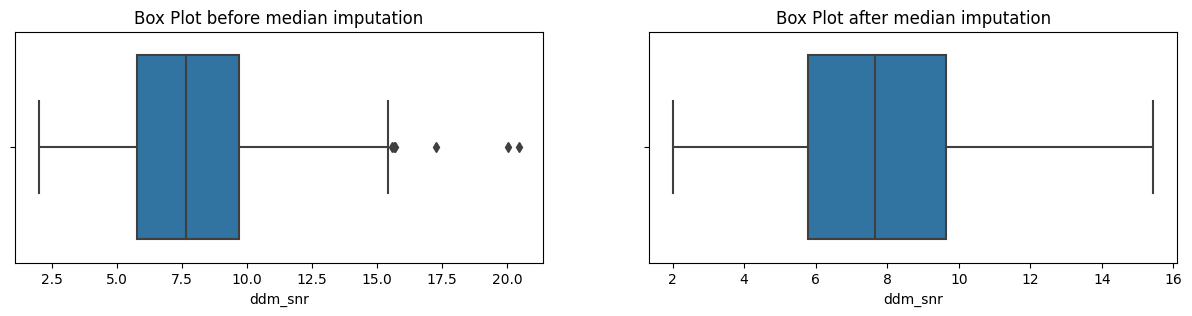

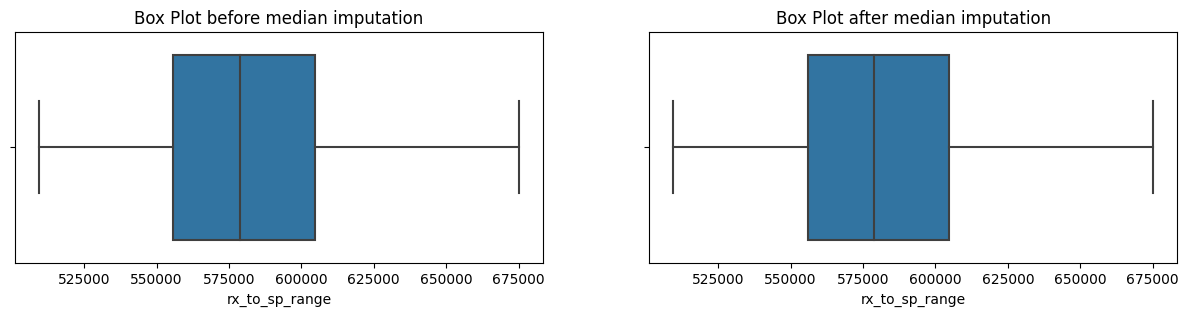

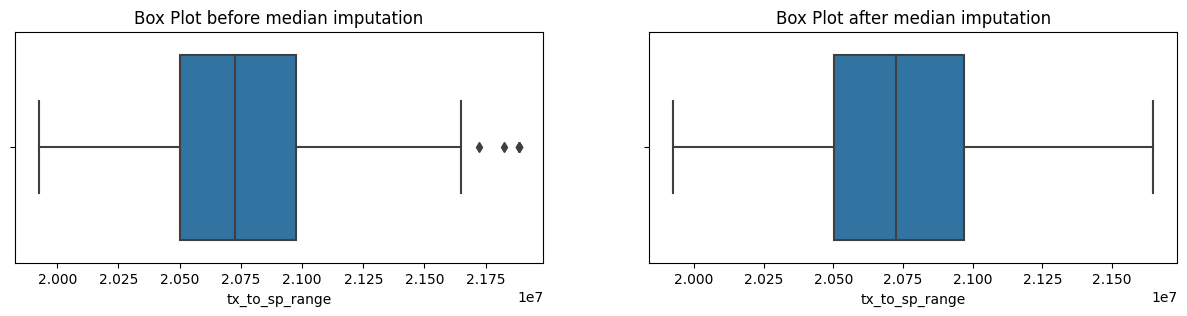

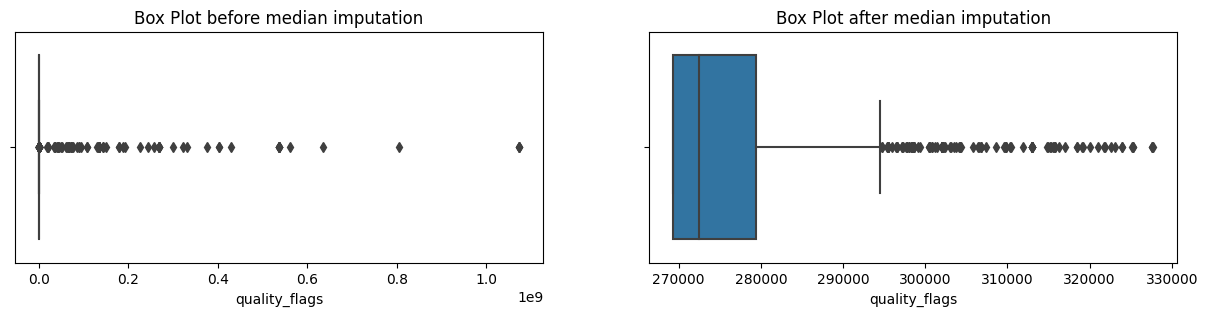

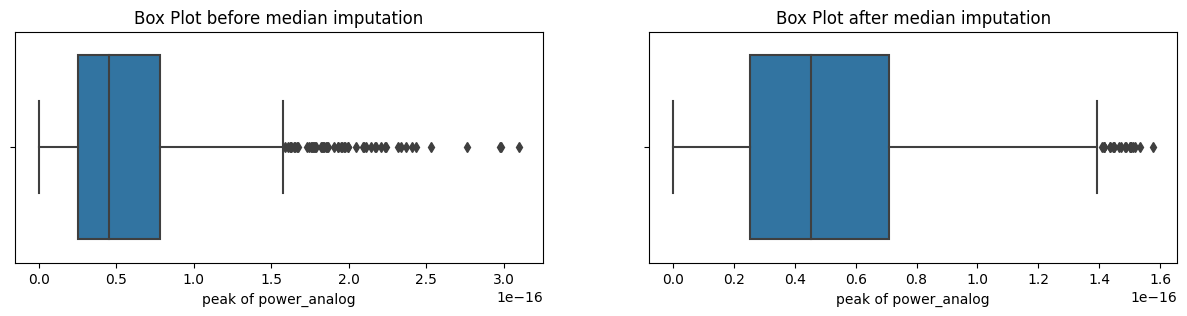

In [36]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before median imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.median(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, m)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after median imputation")
    plt.show()   

+ Median is best measure of central tendency when the data has outlier or skewed.
+ Median imputation completely remove outlier.

## **Zero value imputation

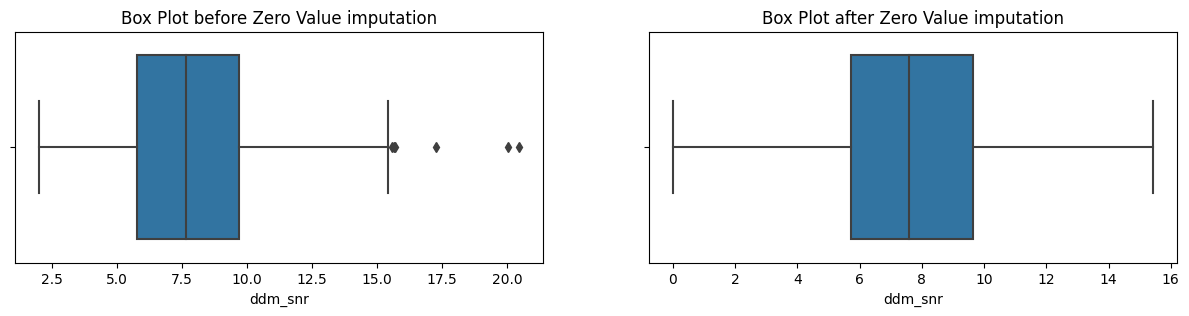

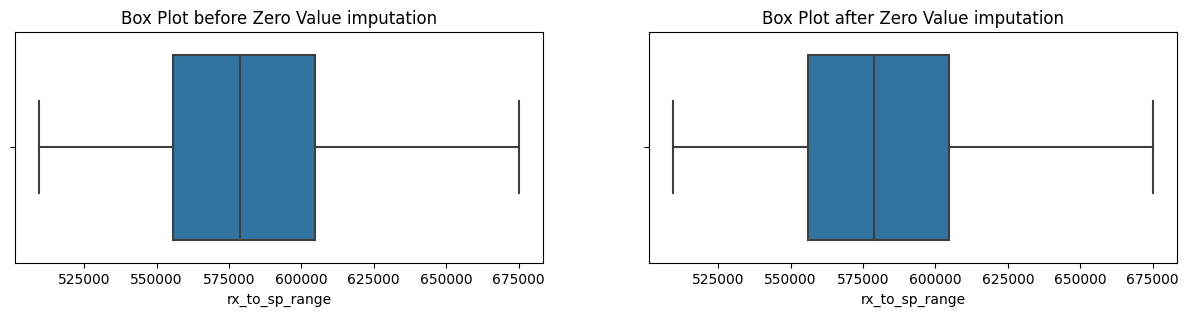

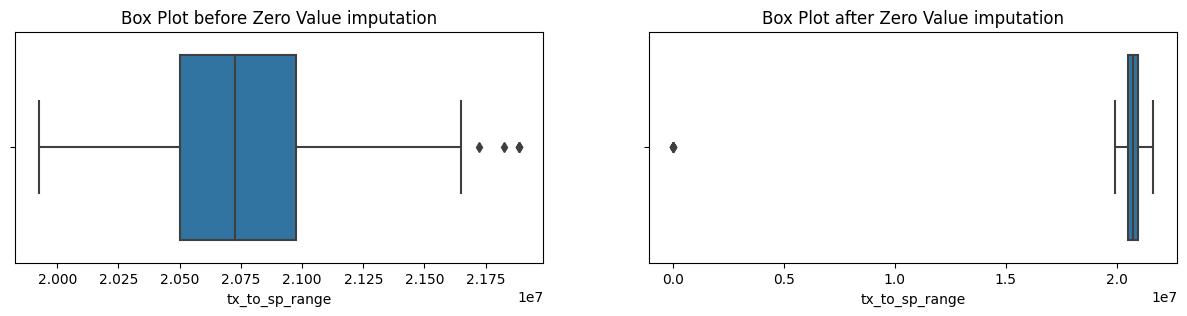

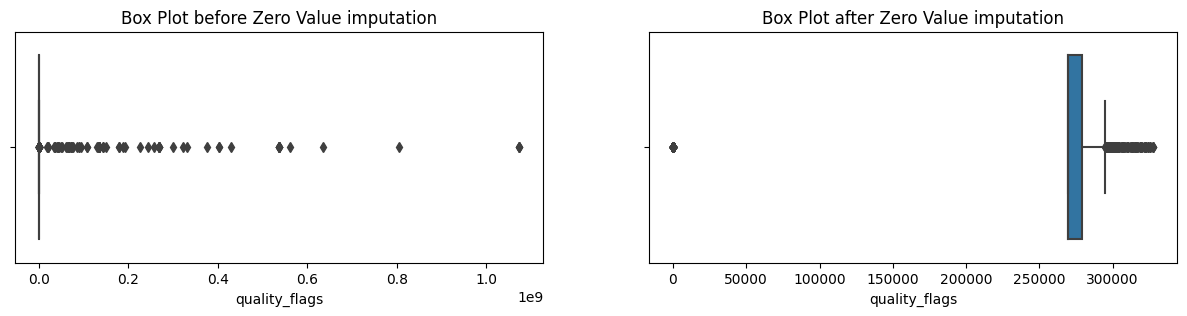

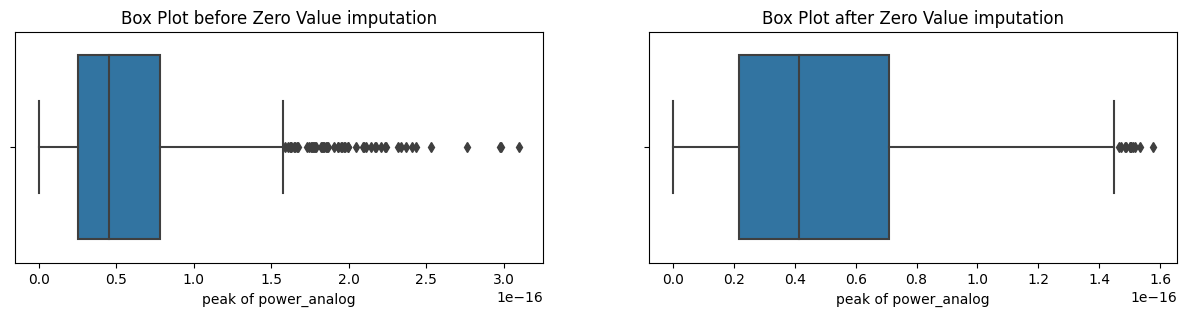

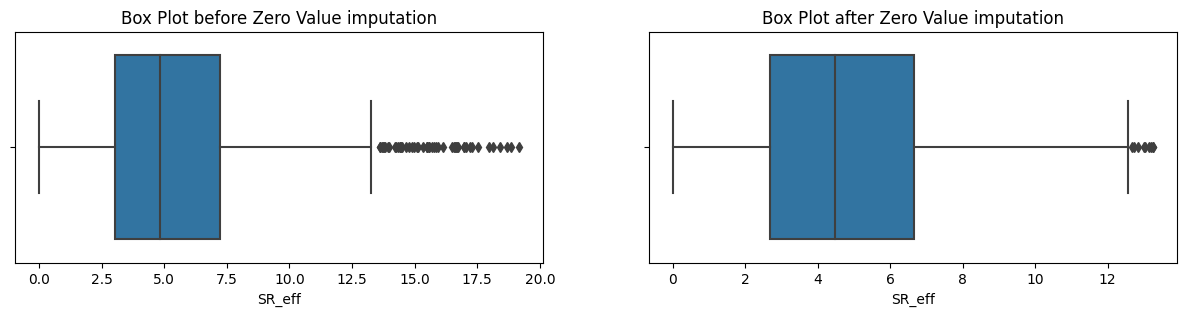

In [37]:
for i in range(len(Variables)):
    df = Data[f'{Variables[i]}']
    plt.figure(figsize=(15,3),dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.title("Box Plot before Zero Value imputation")
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    
    for i in df:
        if i > Upper_tail or i < Lower_tail:
                df = df.replace(i, 0)
    plt.subplot(1,2,2)
    sns.boxplot(df)
    plt.title("Box Plot after Zero Value imputation")
    plt.show()              

## **Separately Treating
+ If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. 
+ One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output. 
+ But this technique is tedious when the dataset is large.